In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [32]:
data = pd.read_csv('train.csv')

In [33]:
data

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
0          0        584        590     909972     909977            16   
1          1        808        816     728350     728372           433   
2          2         39        192    2212076    2212144         11388   
3          3        781        789    3353146    3353173           210   
4          4       1540       1560     618457     618502           521   
...      ...        ...        ...        ...        ...           ...   
19214  19214        749        757     143210     143219            17   
19215  19215        723        735    2488529    2488541           231   
19216  19216          6         31    1578055    1578129           780   
19217  19217          9         18    1713172    1713184           126   
19218  19218       1505       1525    1733458    1733471           182   

       X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0                8            5               2274                    113   
1               20           54              44478                     70   
2              705          420            1311391                     29   
3               16           29               3202                    114   
4               72           67              48231                     82   
...            ...          ...                ...                    ...   
19214            4            4               2193                    122   
19215           17           26              27135                    104   
19216          114           98              71112                     41   
19217           13           26              14808                     88   
19218           24           33              22785                     98   

       ...  Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  \
0      ...            -0.5000           -0.0104          0.1417       0   
1      ...             0.7419           -0.2997          0.9491       0   
2      ...            -0.0105           -0.0944          1.0000       0   
3      ...             0.6667           -0.0402          0.4025       0   
4      ...             0.9158           -0.2455          0.9998       0   
...    ...                ...               ...             ...     ...   
19214  ...            -0.1429            0.0044          0.2901       0   
19215  ...             0.7222           -0.0989          0.5378       0   
19216  ...             0.7719           -0.4283          0.9997       1   
19217  ...             0.9610           -0.1162          0.3509       0   
19218  ...             0.5263           -0.1120          0.6619       0   

       Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0              0         0       1          0      0             0  
1              0         0       0          0      0             1  
2              0         1       0          0      0             0  
3              0         1       0          0      0             0  
4              0         0       0          0      0             1  
...          ...       ...     ...        ...    ...           ...  
19214          0         0       1          0      0             0  
19215          0         0       0          0      0             1  
19216          0         0       0          0      0             0  
19217          0         0       0          0      0             1  
19218          0         0       0          0      1             0  

[19219 rows x 35 columns]

In [57]:
unique_counts = data.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'id' in continuous_vars:
    continuous_vars.remove('id')

CATEGORICAL COLUMN ANALYSIS

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


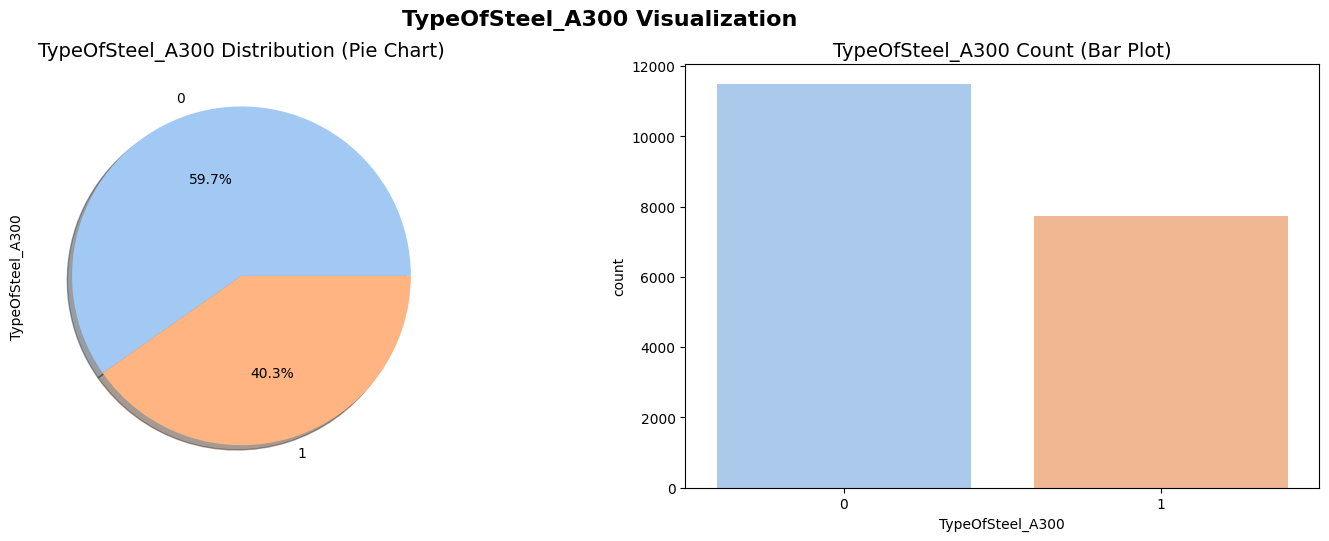

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


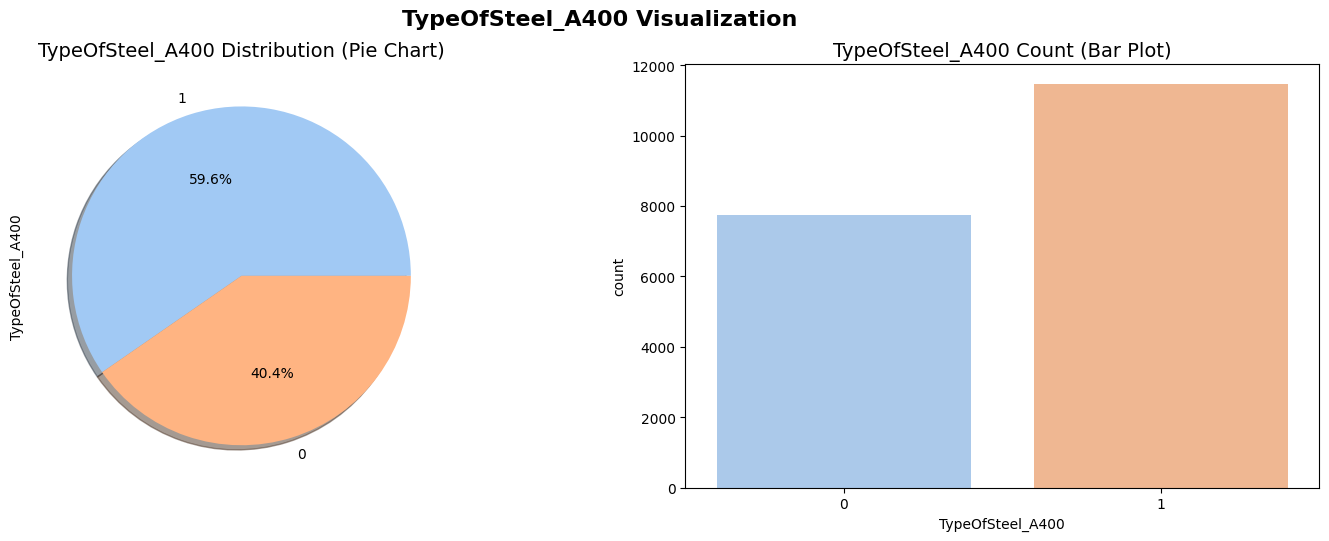

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


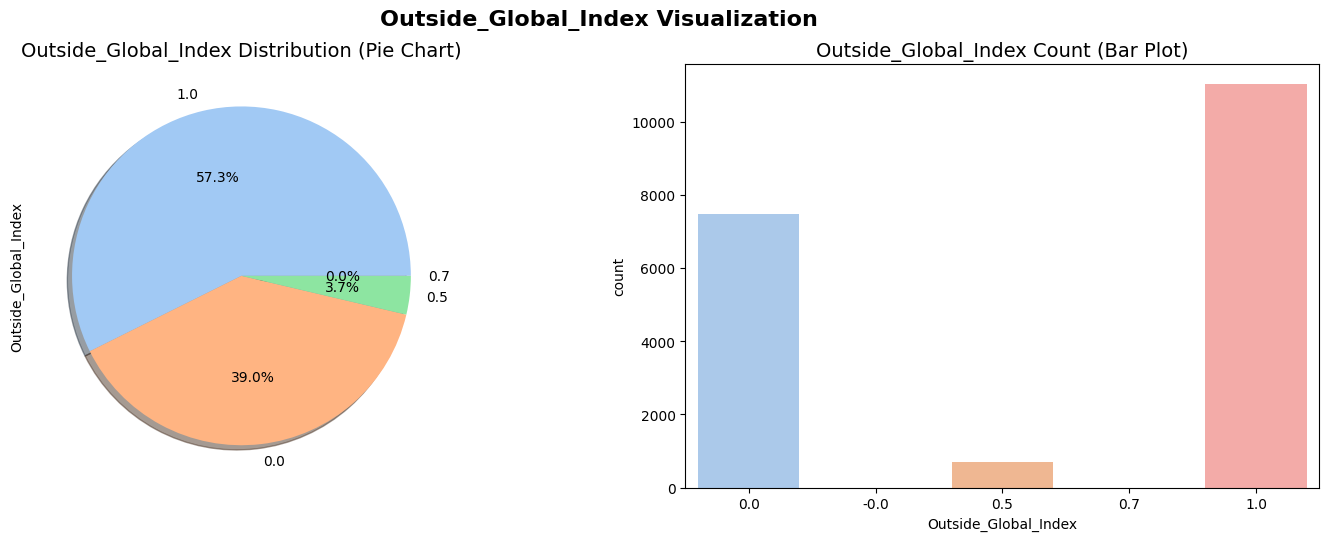

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


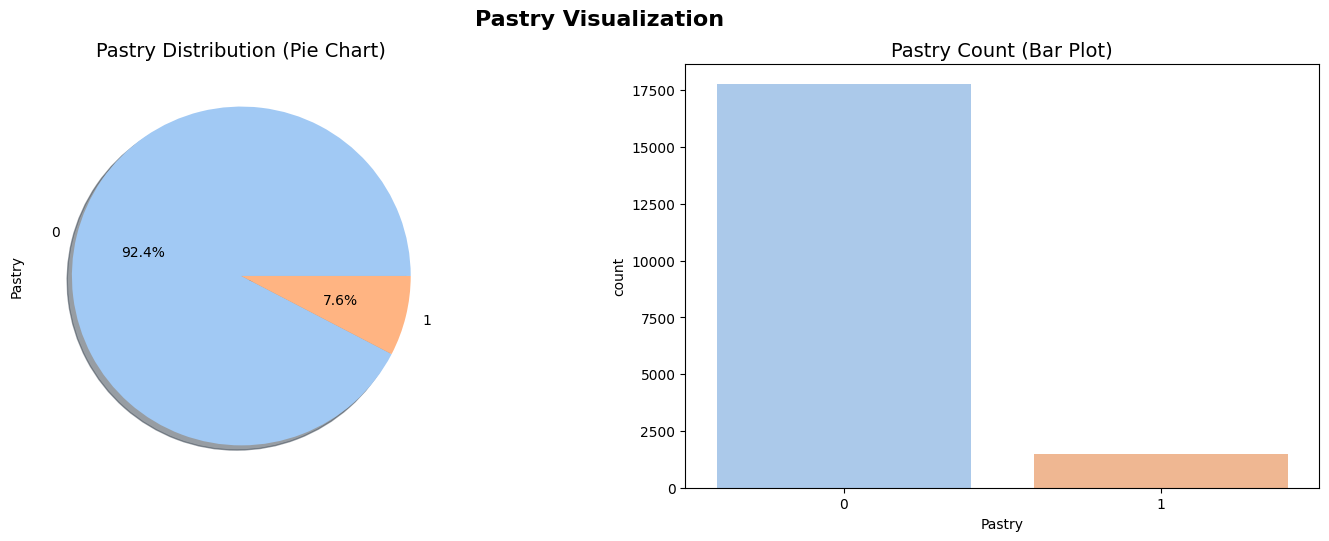

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


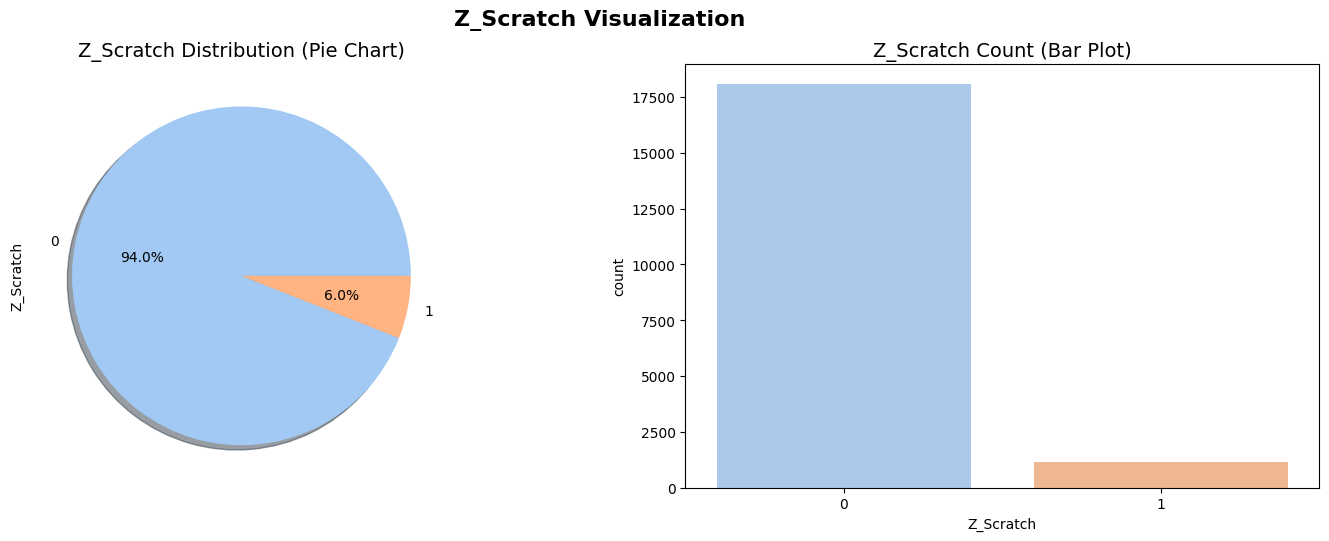

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


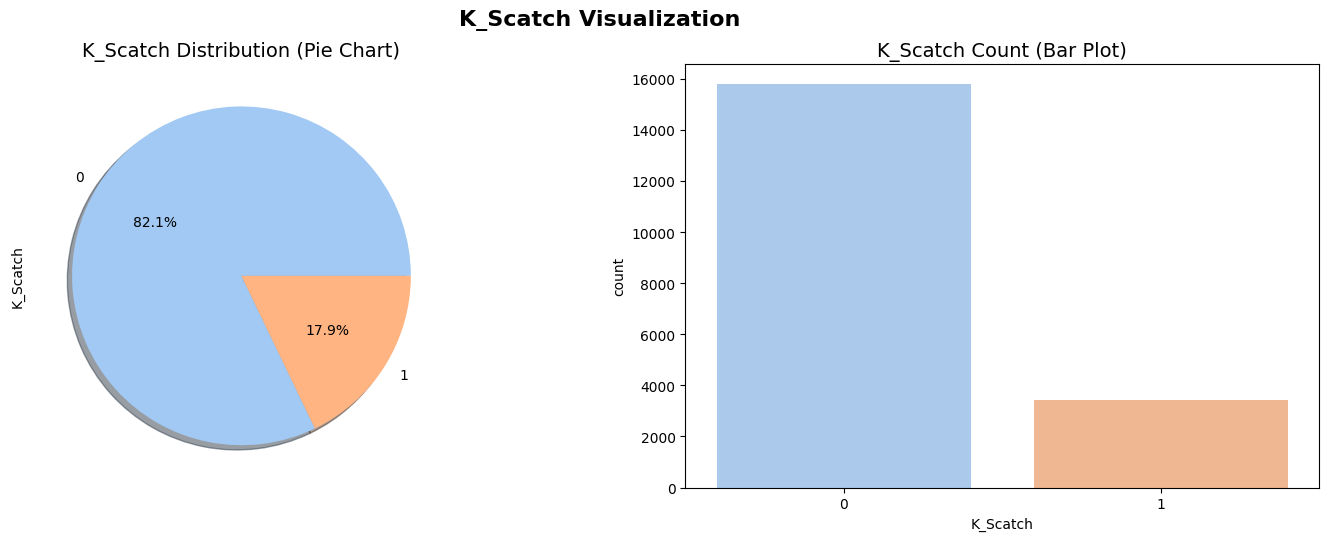

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


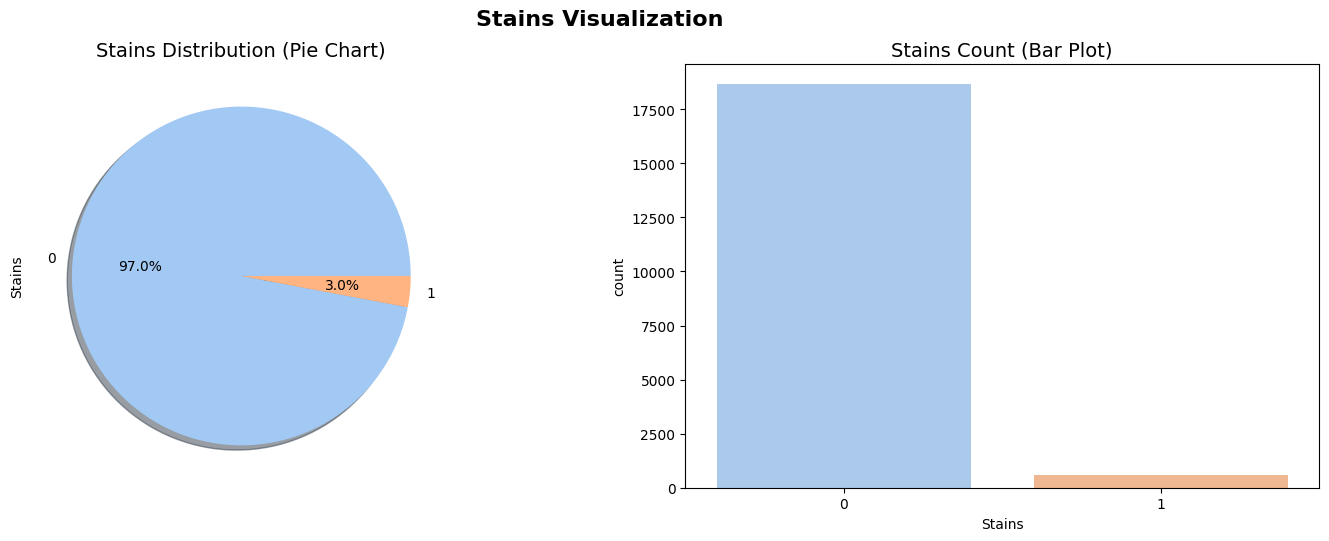

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


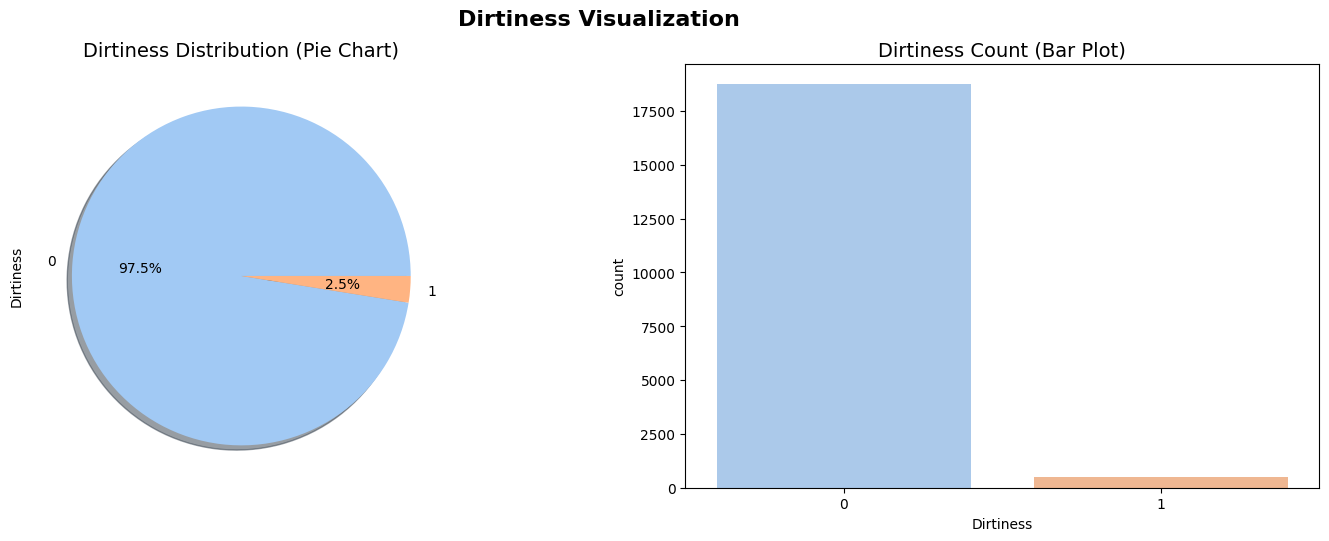

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


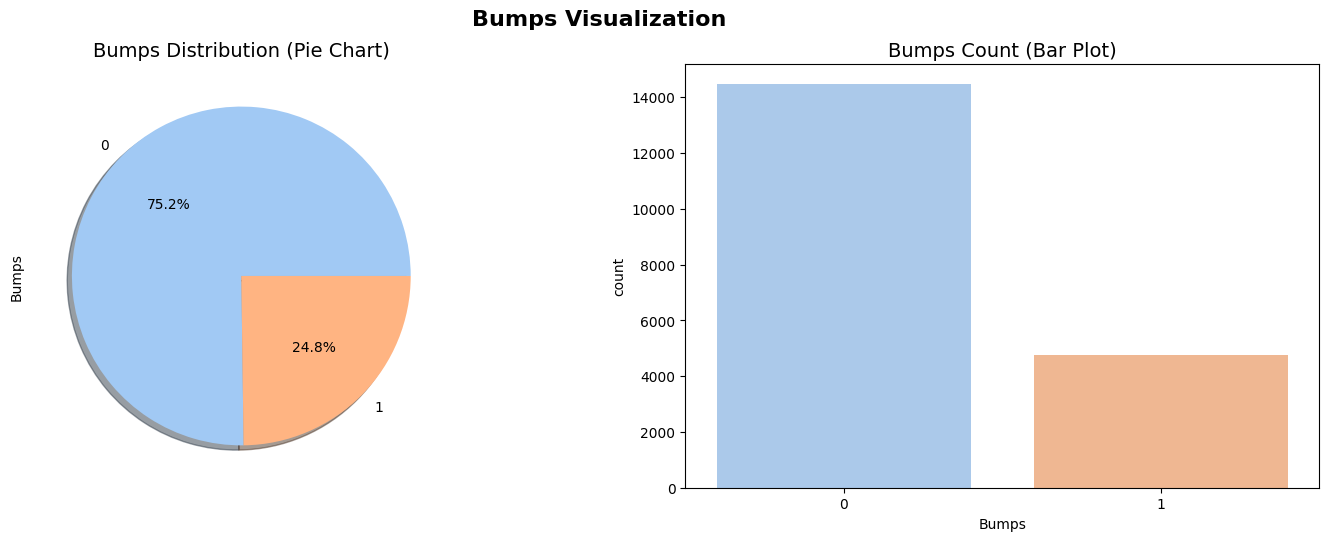

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3883852747.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)


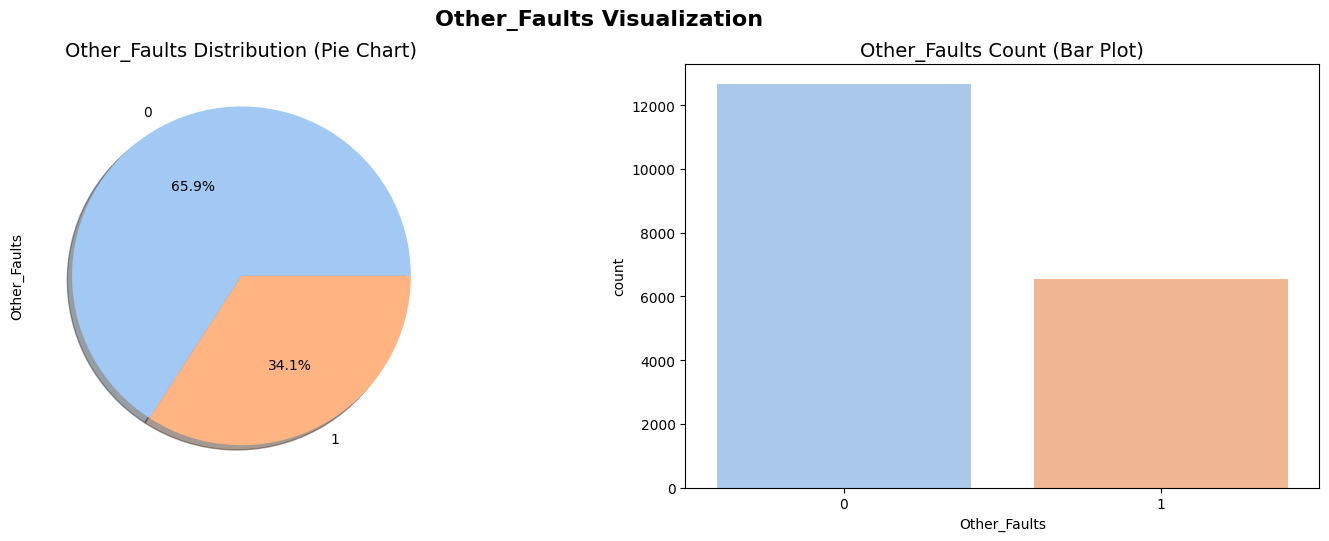

In [58]:
custom_palette = sns.color_palette("pastel")

for column in categorical_vars:
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=data, ax=ax[1], palette=custom_palette)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.show()

CONTINUOUS COLUMN ANALYSIS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


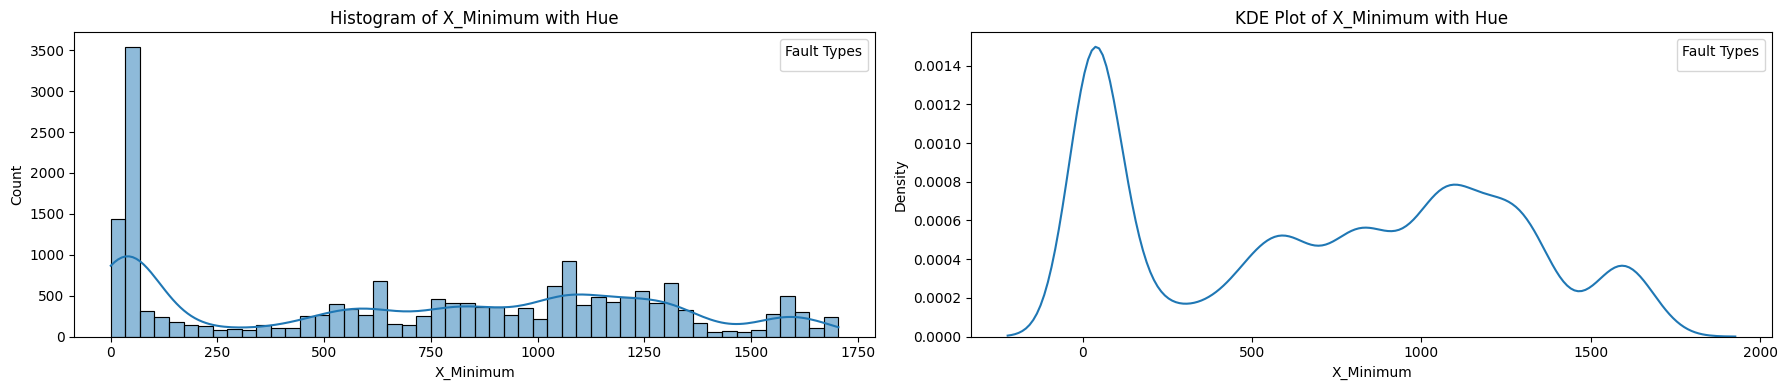

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


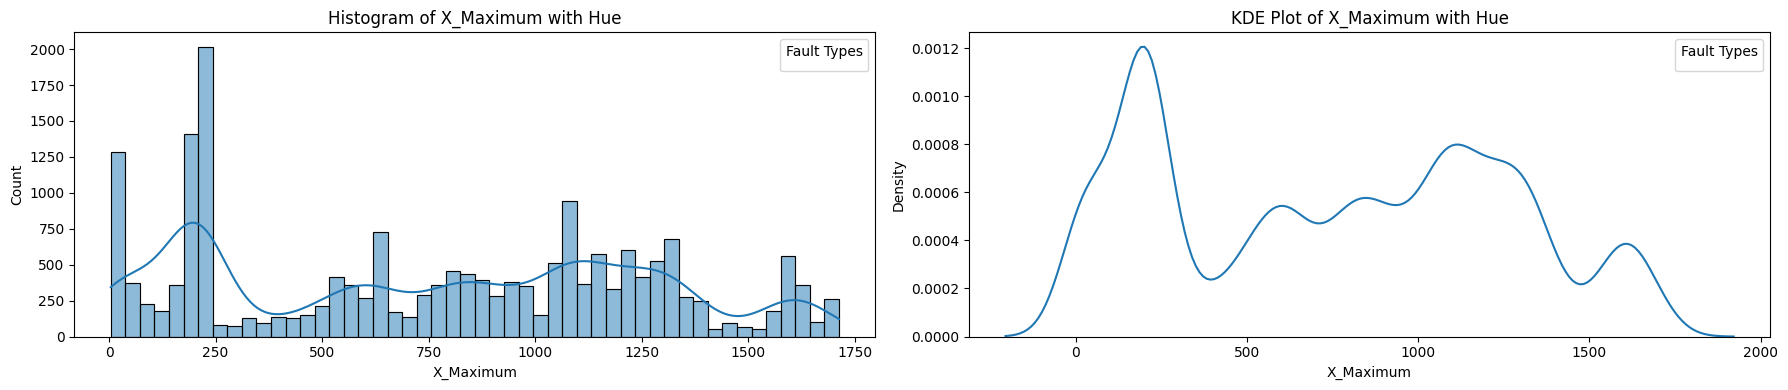

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


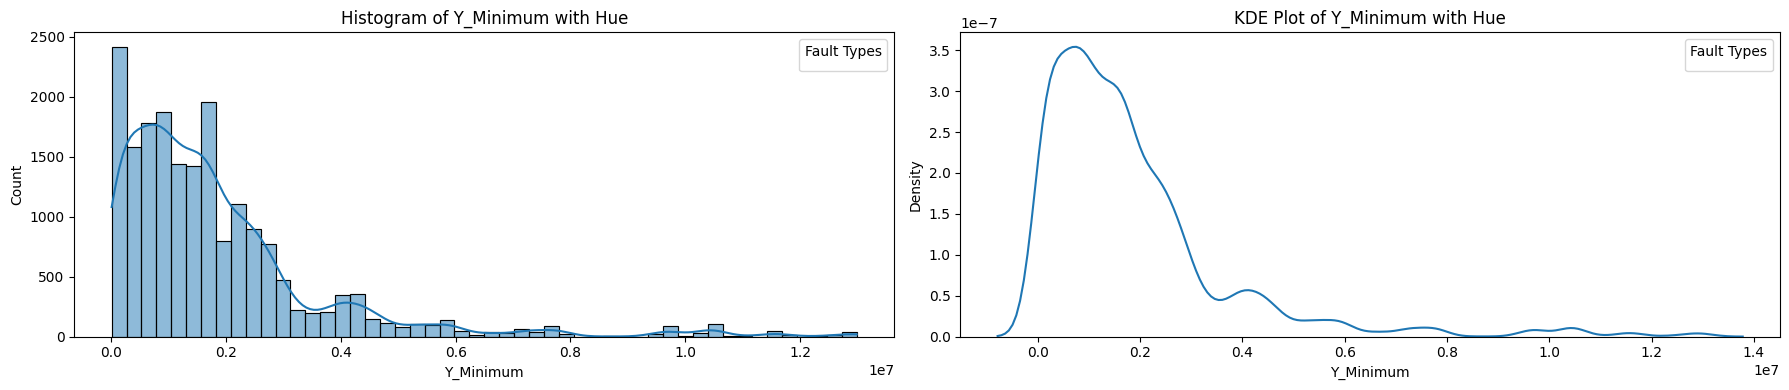

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


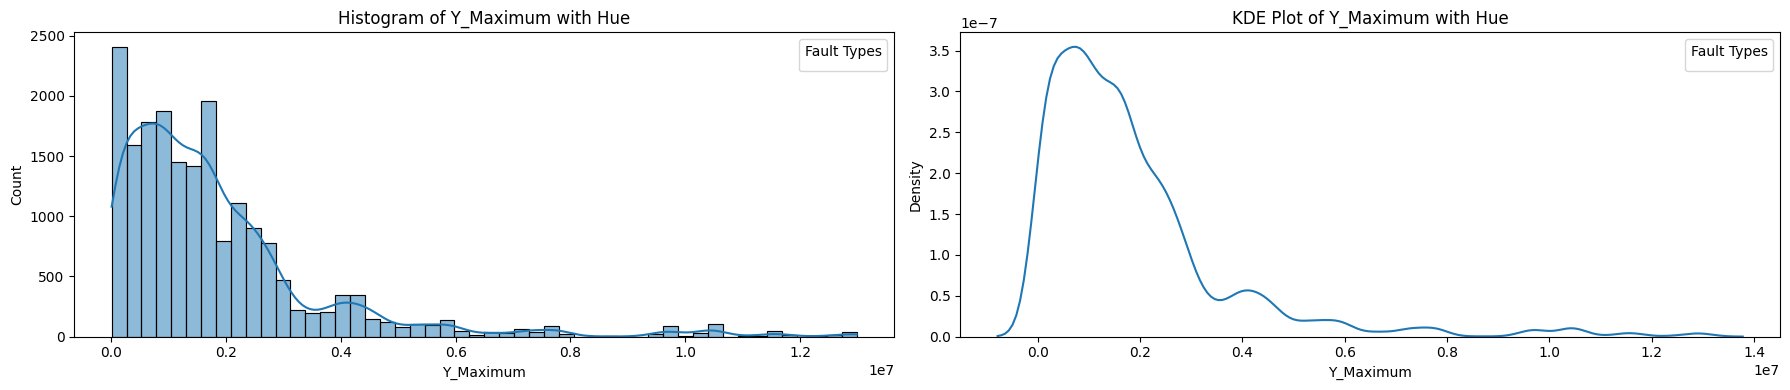

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


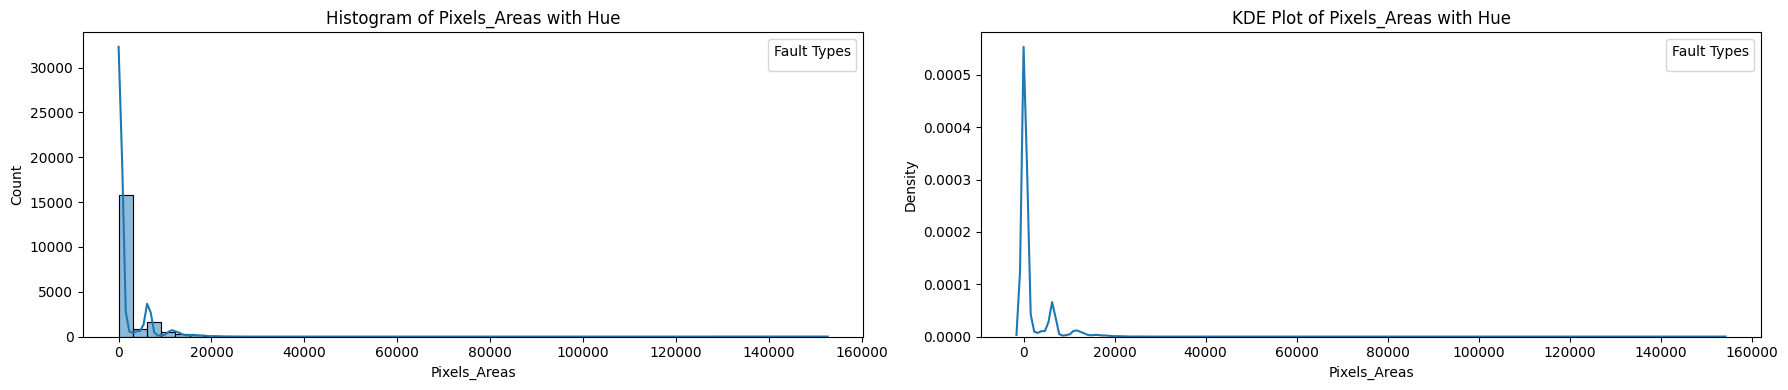

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


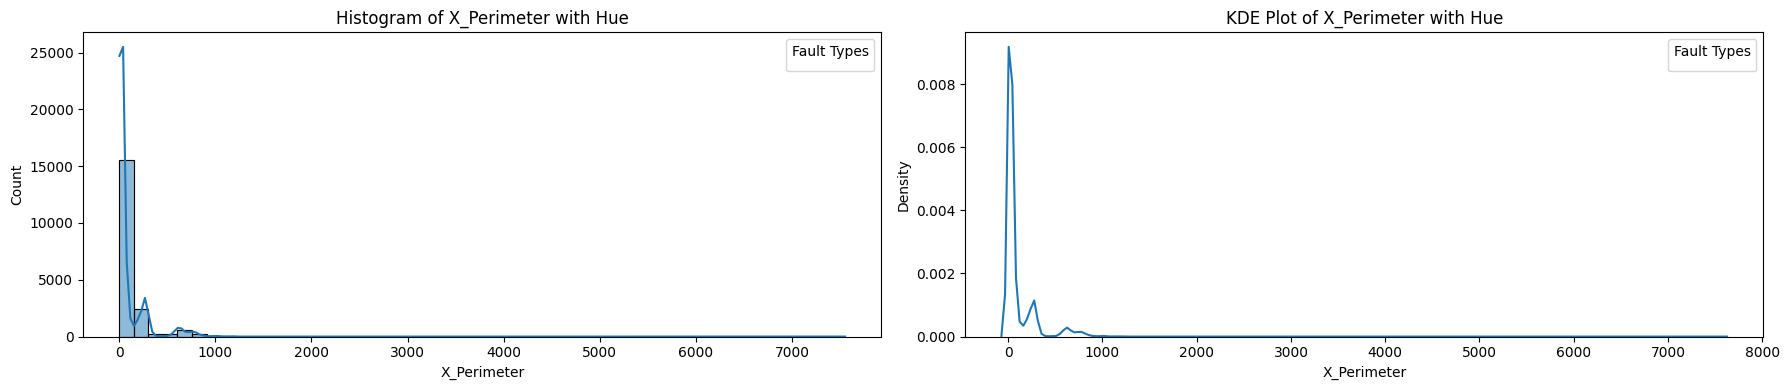

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


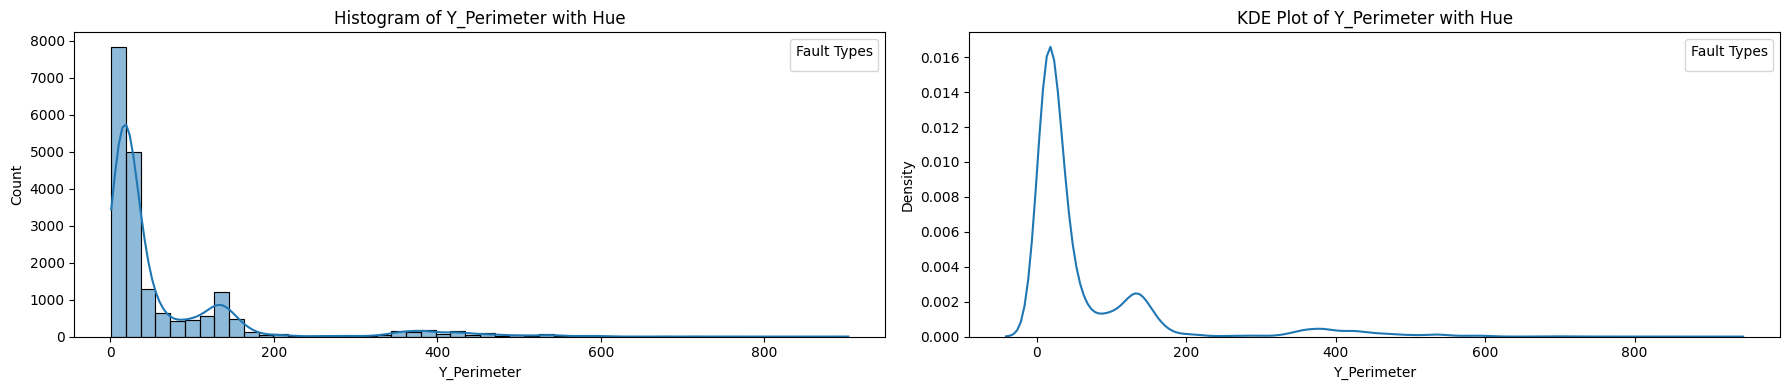

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


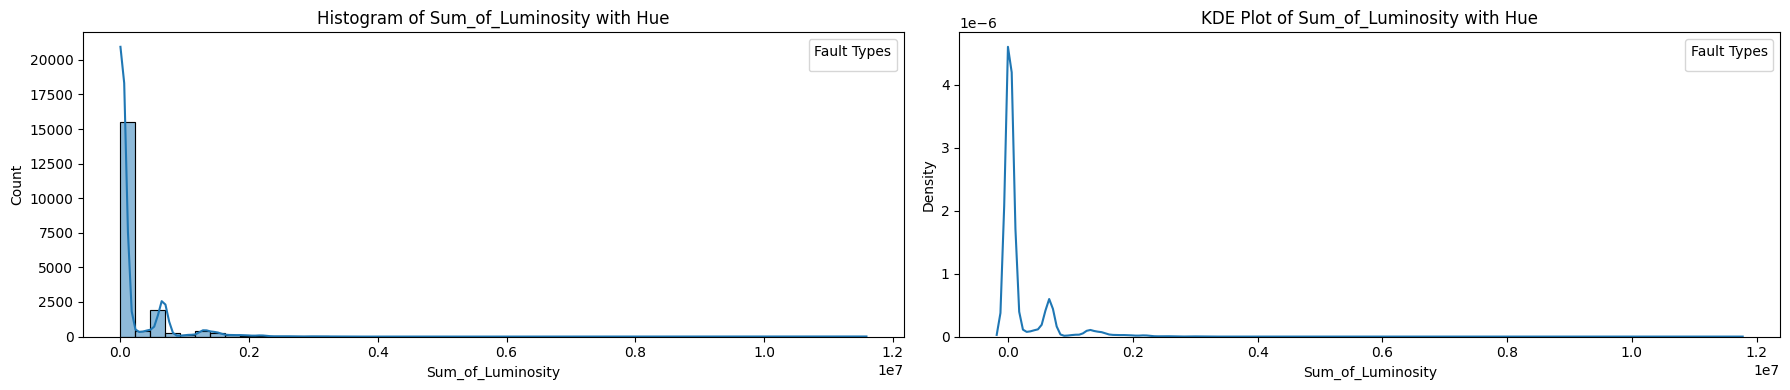

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


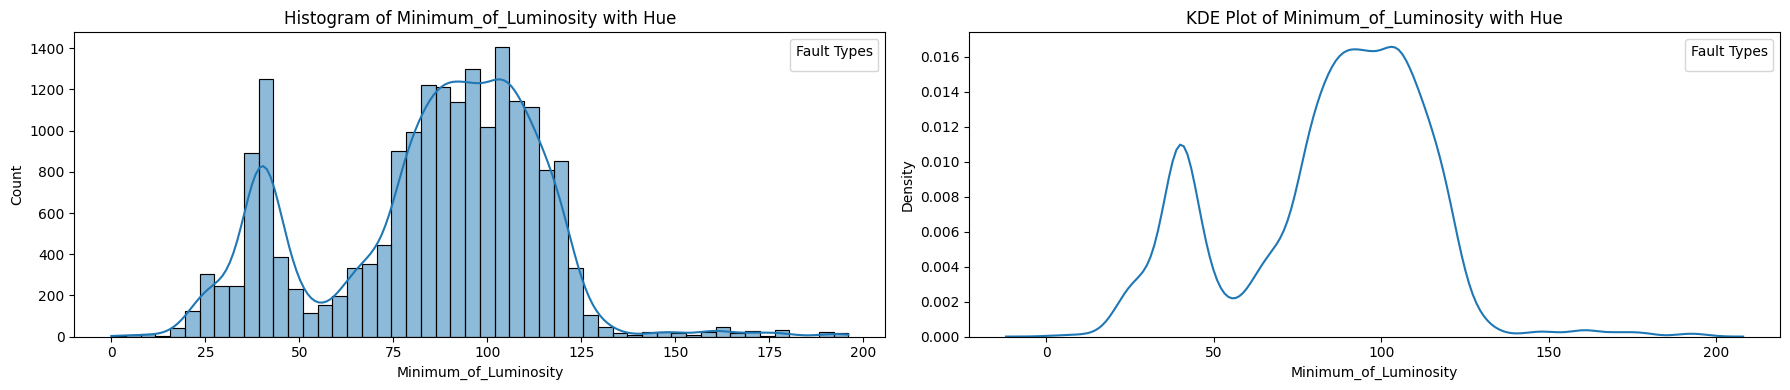

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


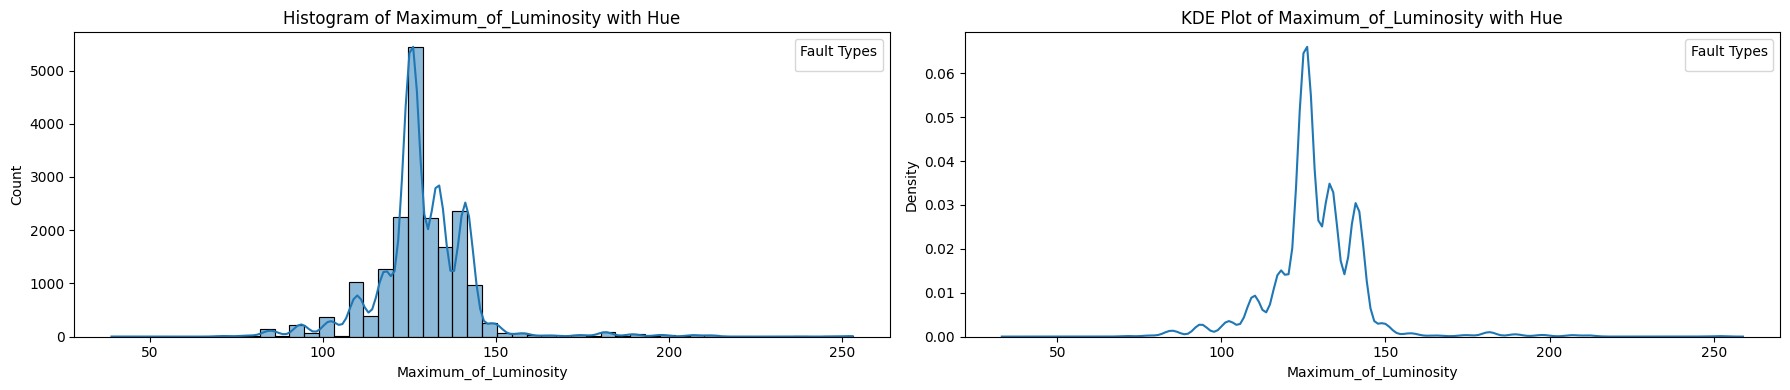

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


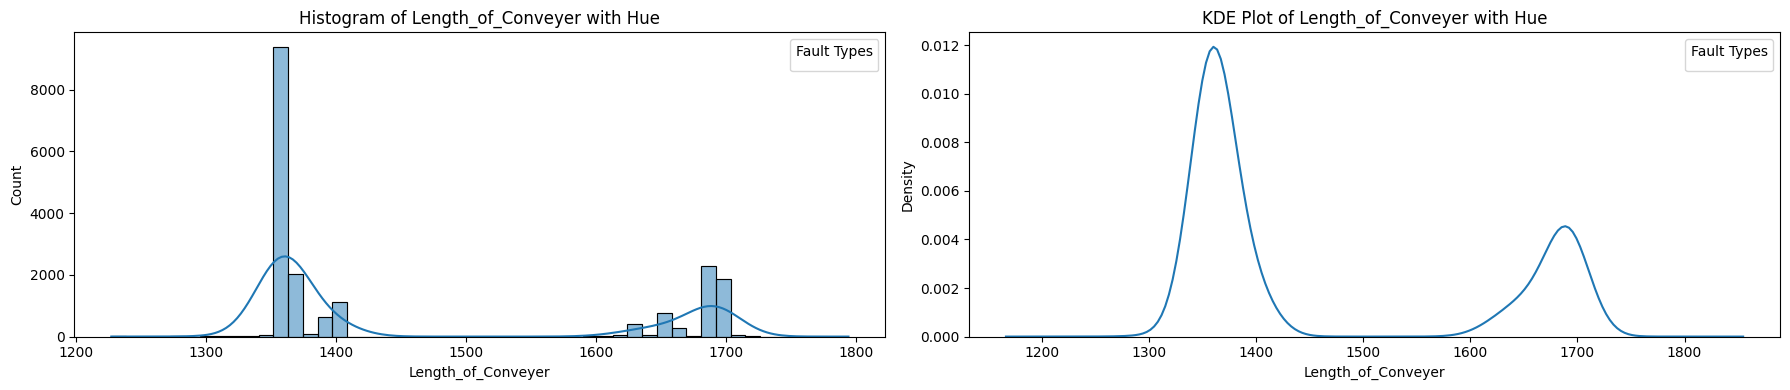

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


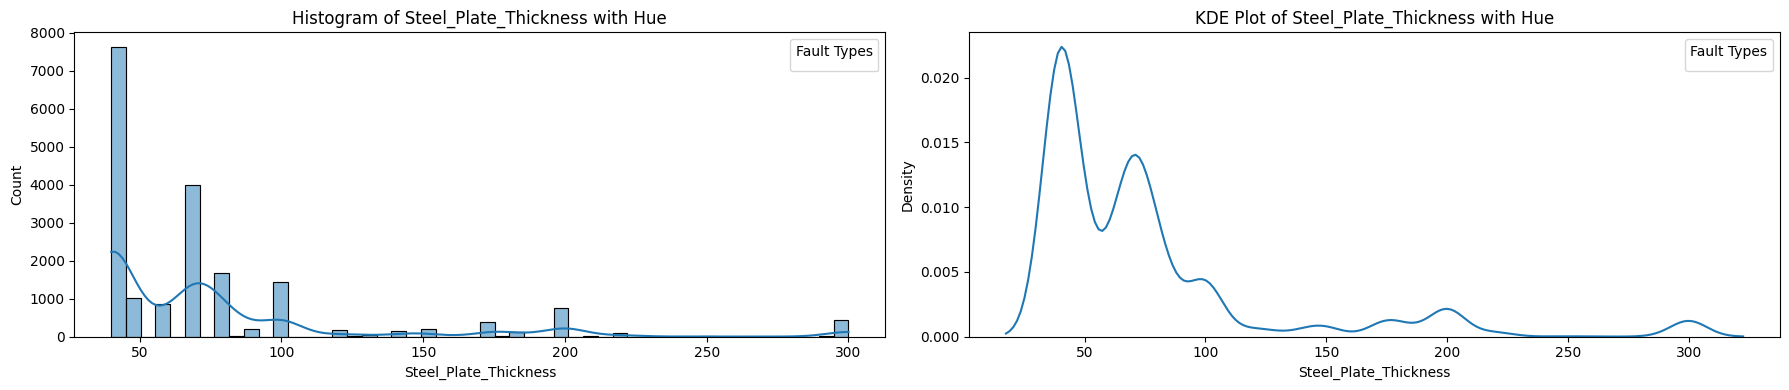

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


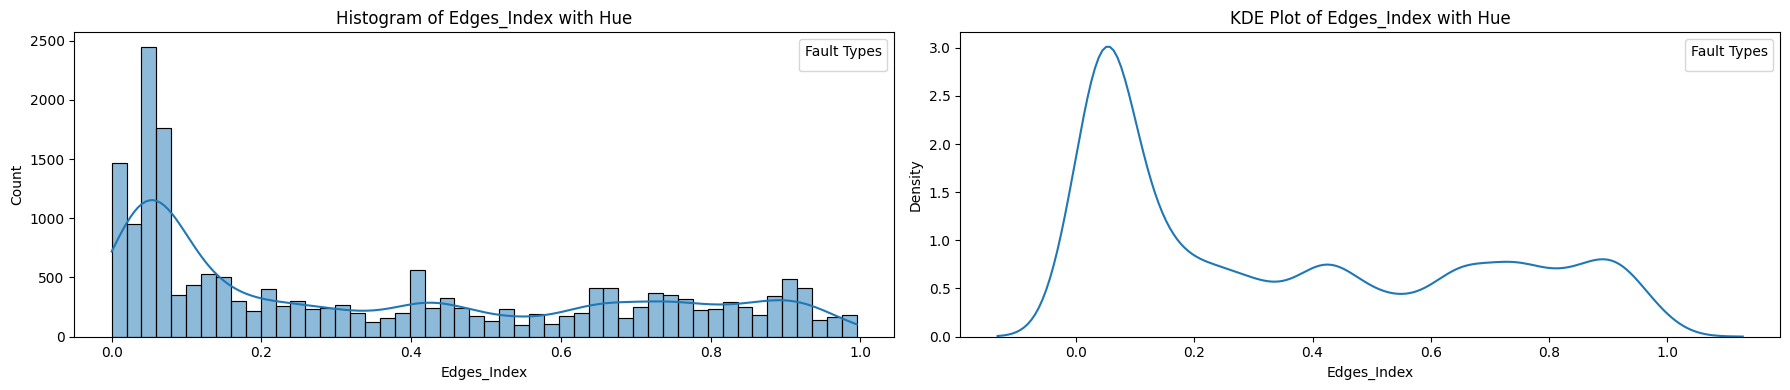

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


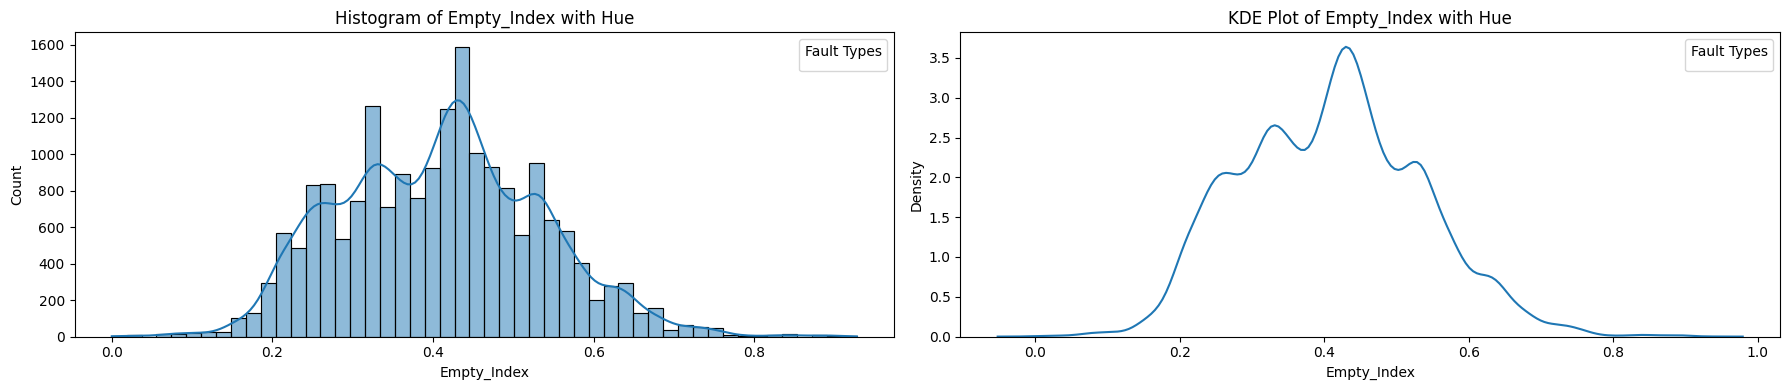

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


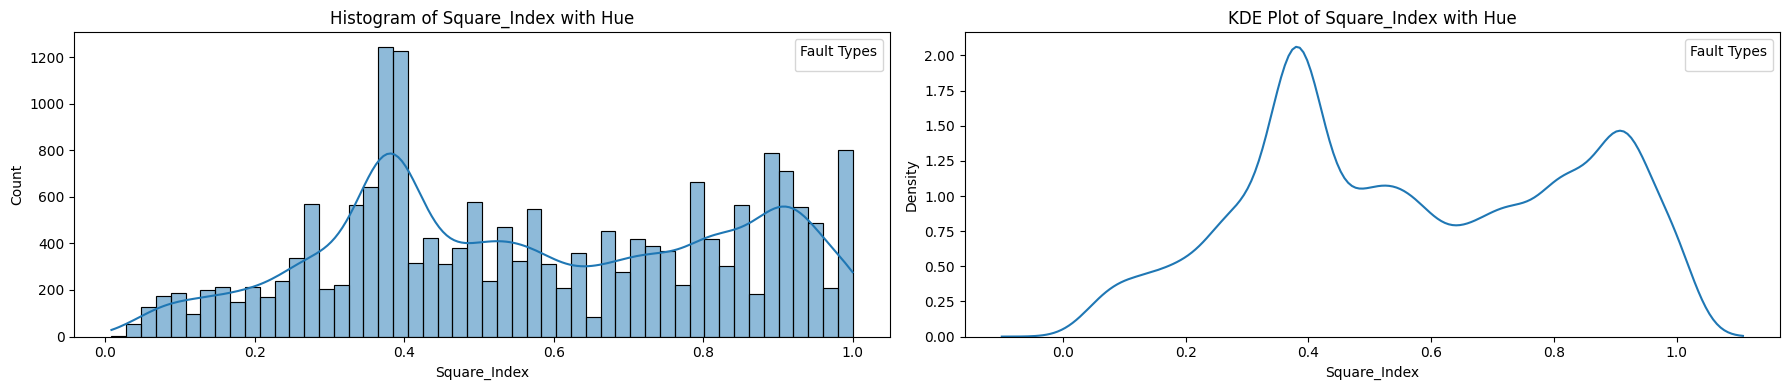

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


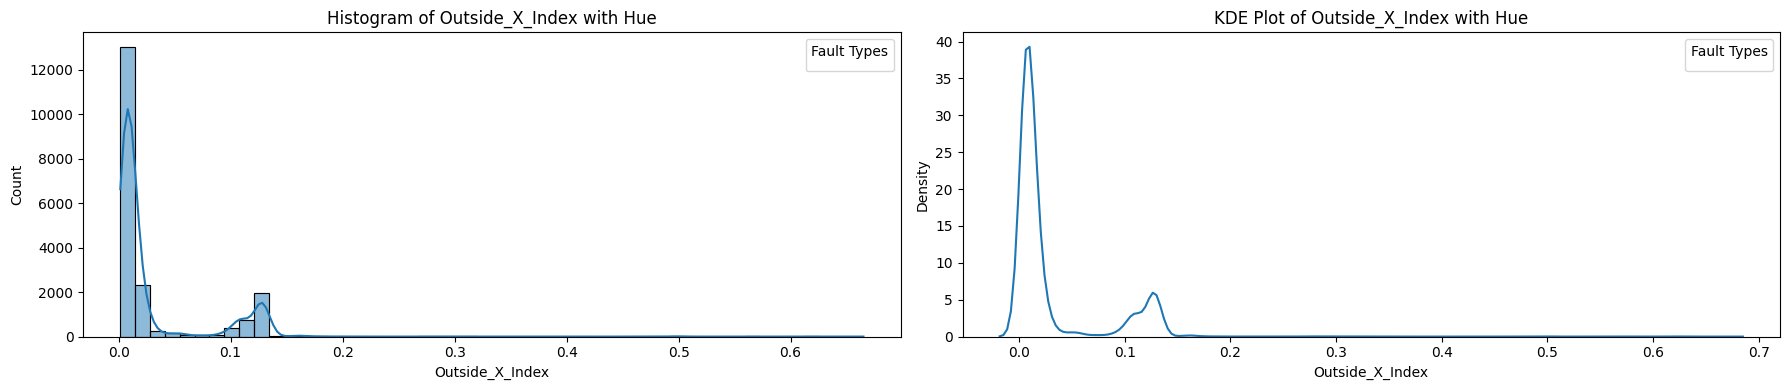

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


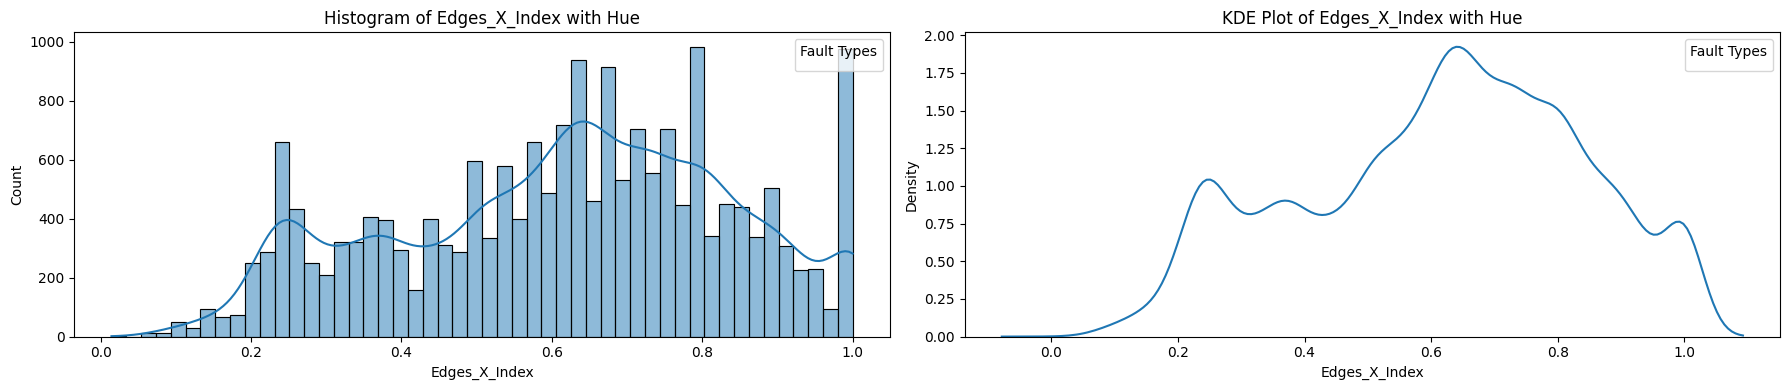

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


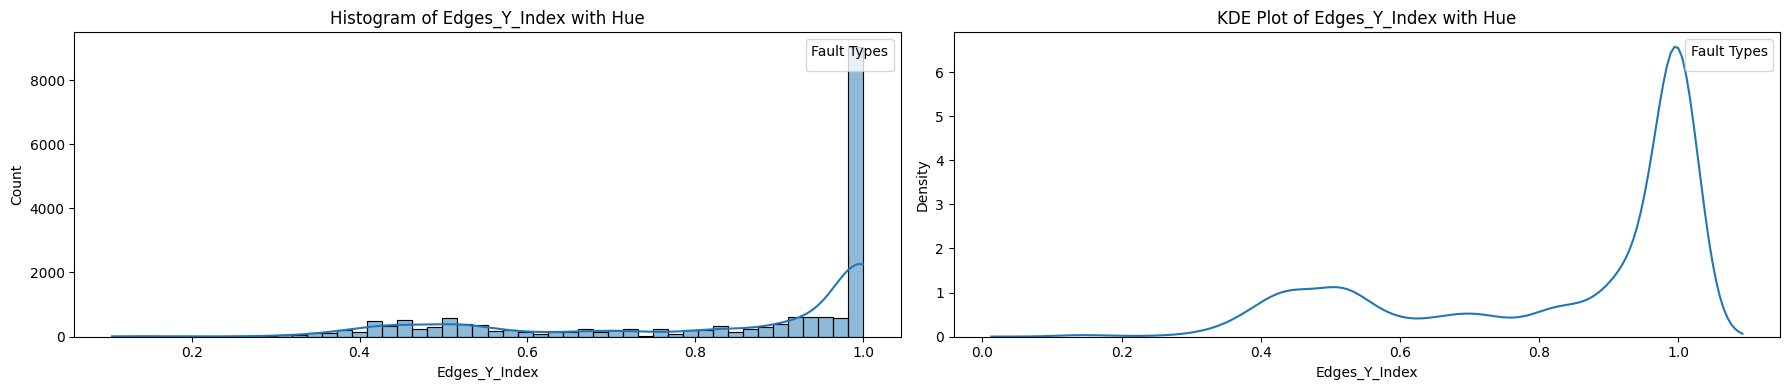

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


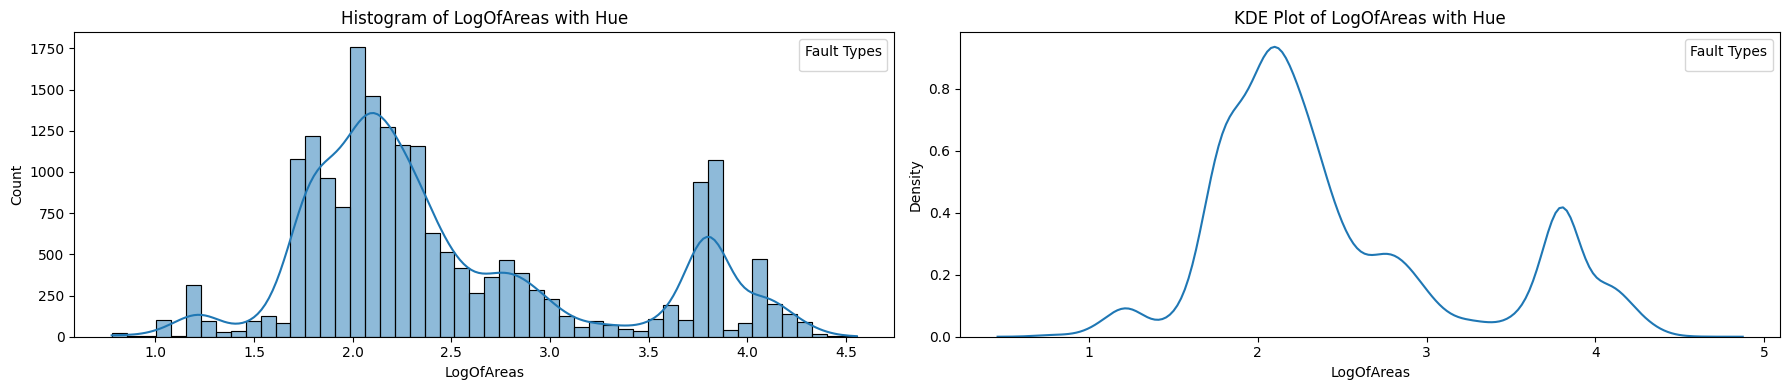

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


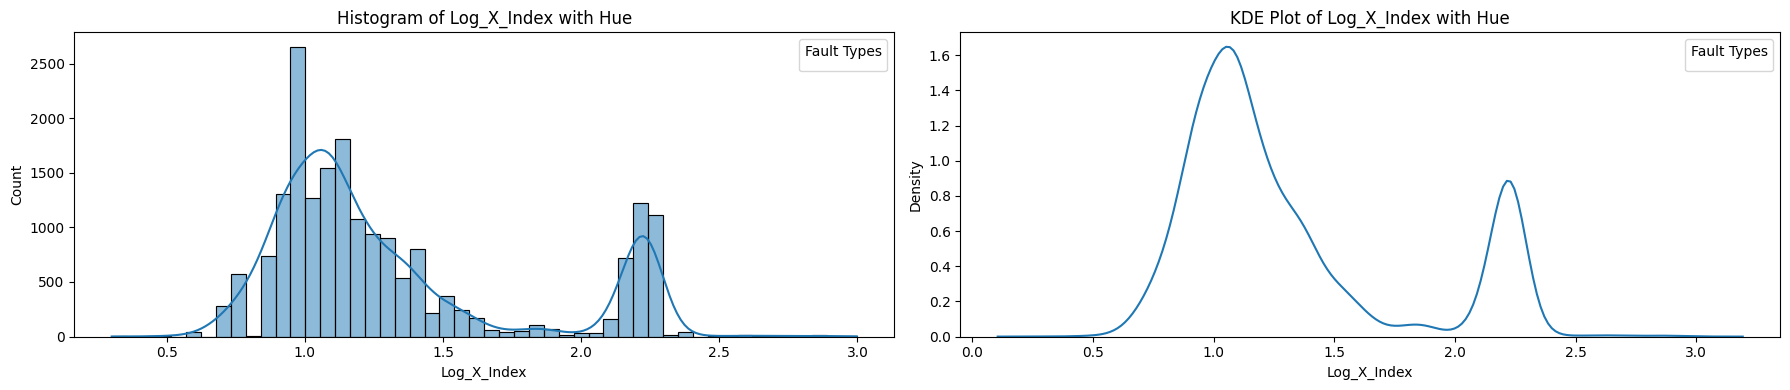

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


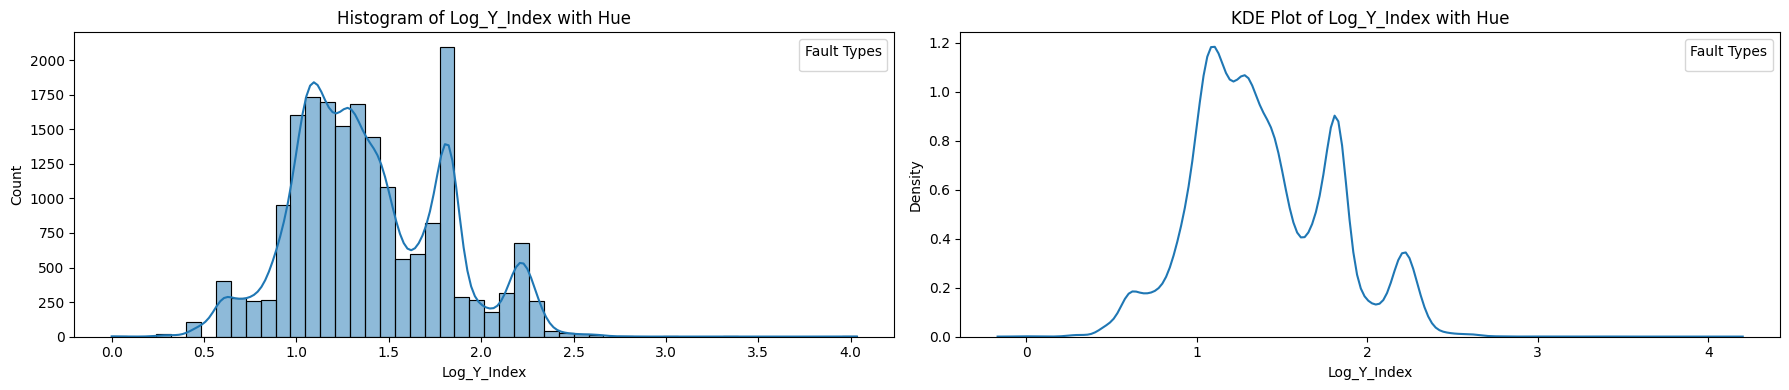

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


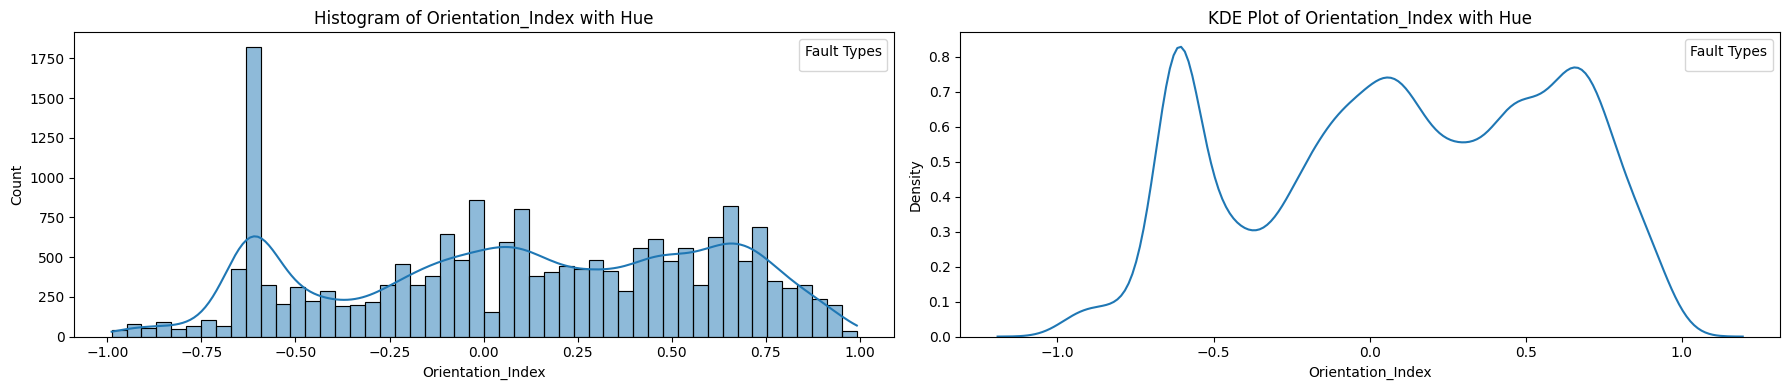

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


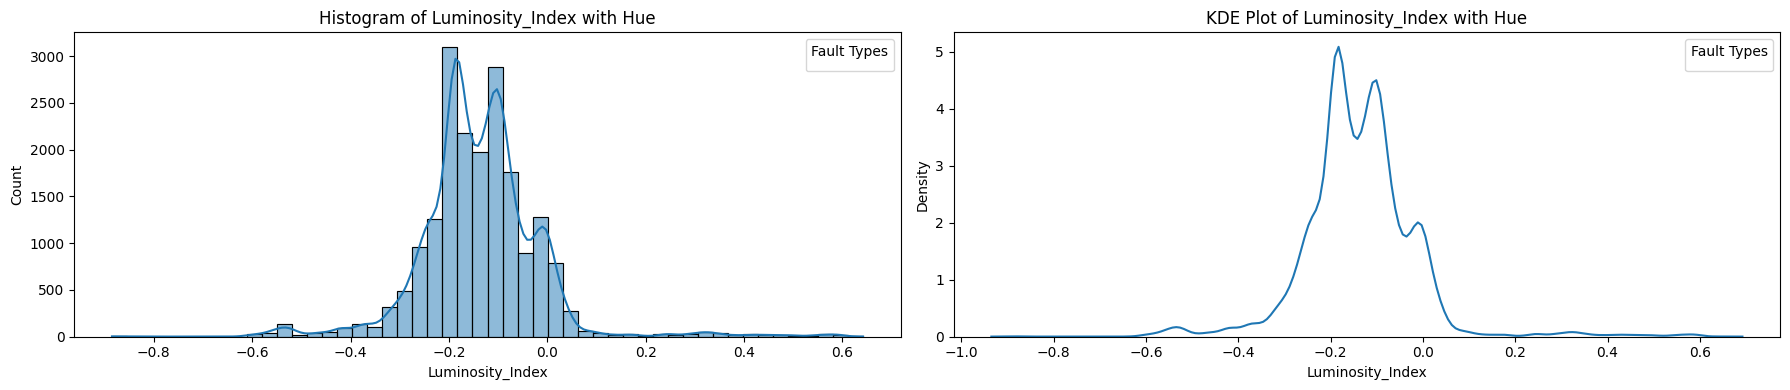

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


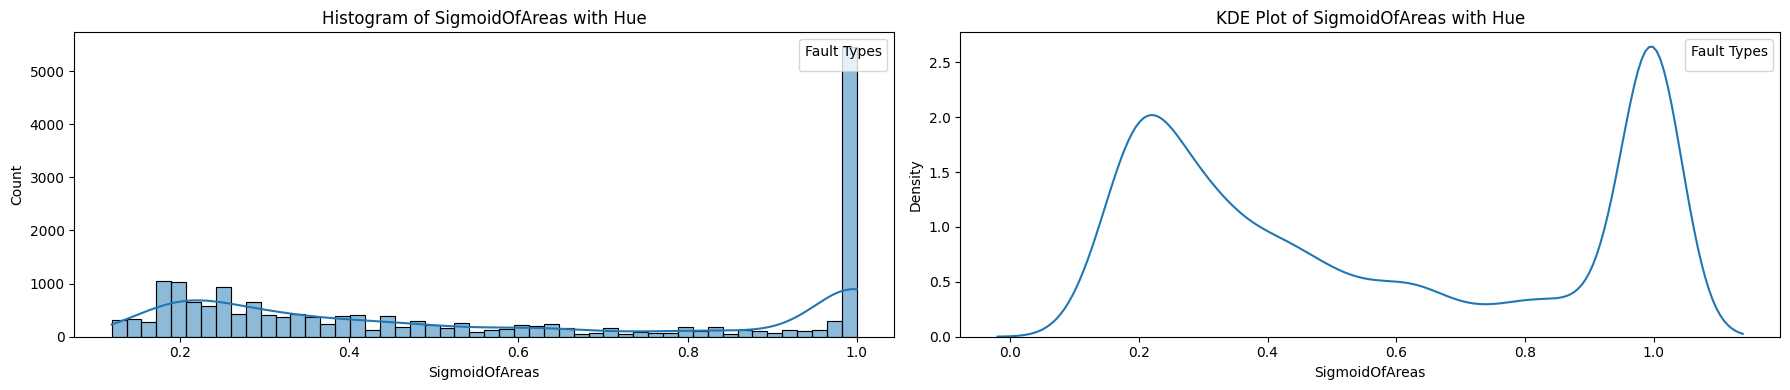

In [59]:
import warnings
warnings.filterwarnings("ignore")
hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
pd.set_option('mode.use_inf_as_na', False)
for column in continuous_vars:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # Create subplots with 1 row and 2 columns
    
    # Plot histogram with hue
    sns.histplot(data=data, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column} with Hue')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Fault Types', loc='upper right')
    
    # Plot KDE plot with hue
    sns.kdeplot(data=data, x=column, hue_order=hue_columns, ax=axes[1])
    axes[1].set_title(f'KDE Plot of {column} with Hue')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    axes[1].legend(title='Fault Types', loc='upper right')
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

In [34]:
y = data[['Pastry' , 'Z_Scratch' , 'K_Scatch', 'Stains' , 'Dirtiness' , 'Bumps' , 'Other_Faults']]

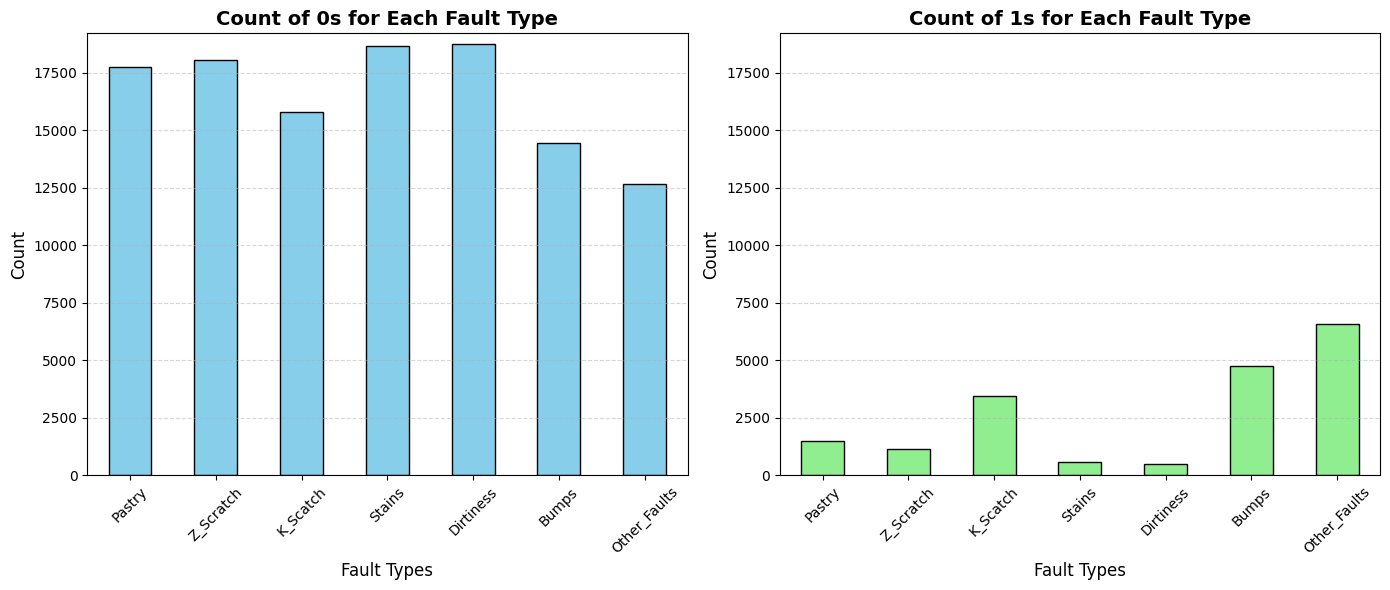

In [56]:
fault_counts_0 = y[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].apply(lambda x: (x == 0).sum())
fault_counts_1 = y[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].apply(lambda x: (x == 1).sum())

# Plotting
plt.figure(figsize=(14, 6))

# Plotting counts of 0s
plt.subplot(1, 2, 1)
fault_counts_0.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of 0s for Each Fault Type', fontsize=14, fontweight='bold')
plt.xlabel('Fault Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, len(y))  # Ensure the y-axis starts from 0 and ends at the total number of rows
plt.tight_layout()

# Plotting counts of 1s
plt.subplot(1, 2, 2)
fault_counts_1.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Count of 1s for Each Fault Type', fontsize=14, fontweight='bold')
plt.xlabel('Fault Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, len(y))  # Ensure the y-axis starts from 0 and ends at the total number of rows
plt.tight_layout()

plt.show()

ANALYSIS BY QQ PLOT

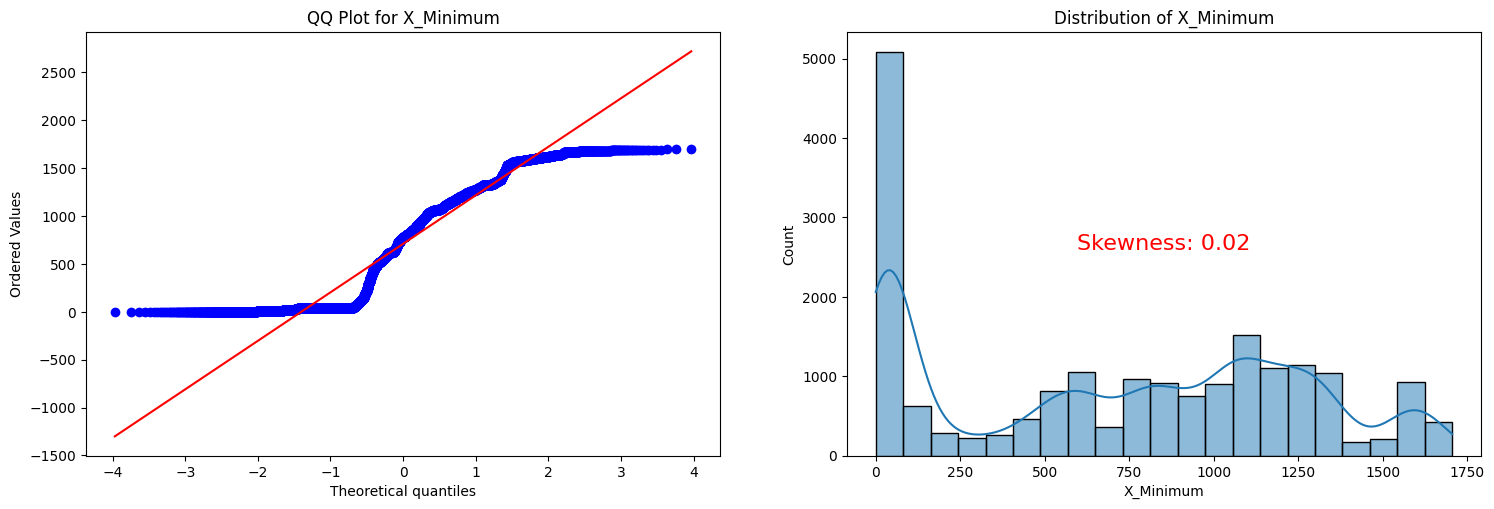

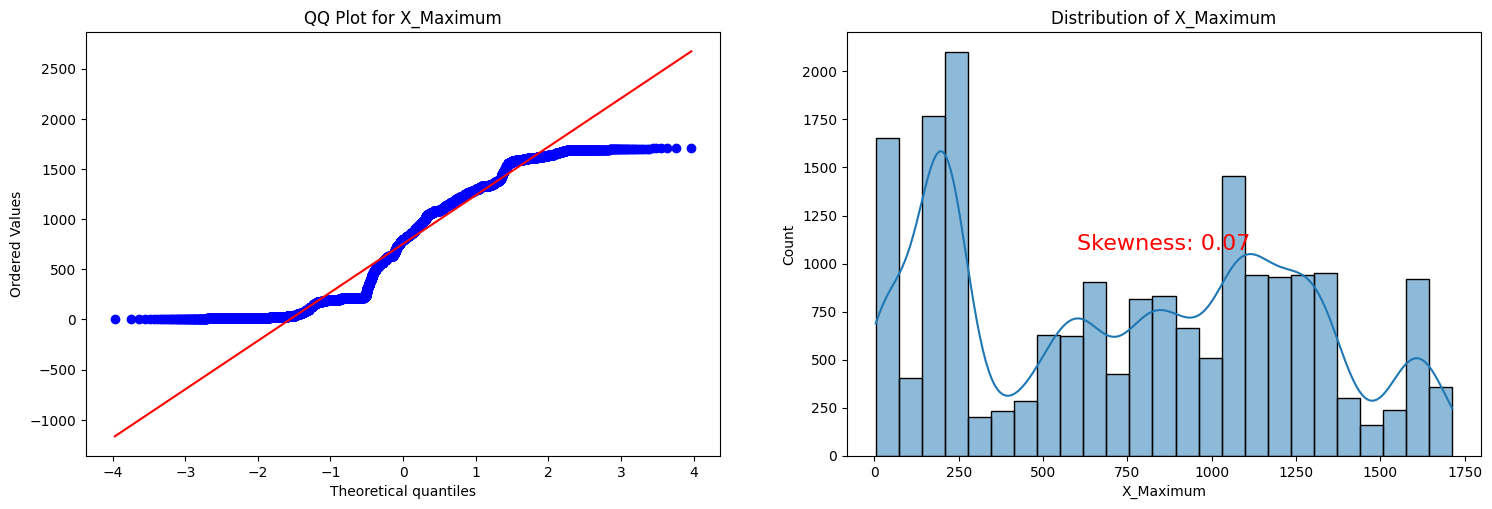

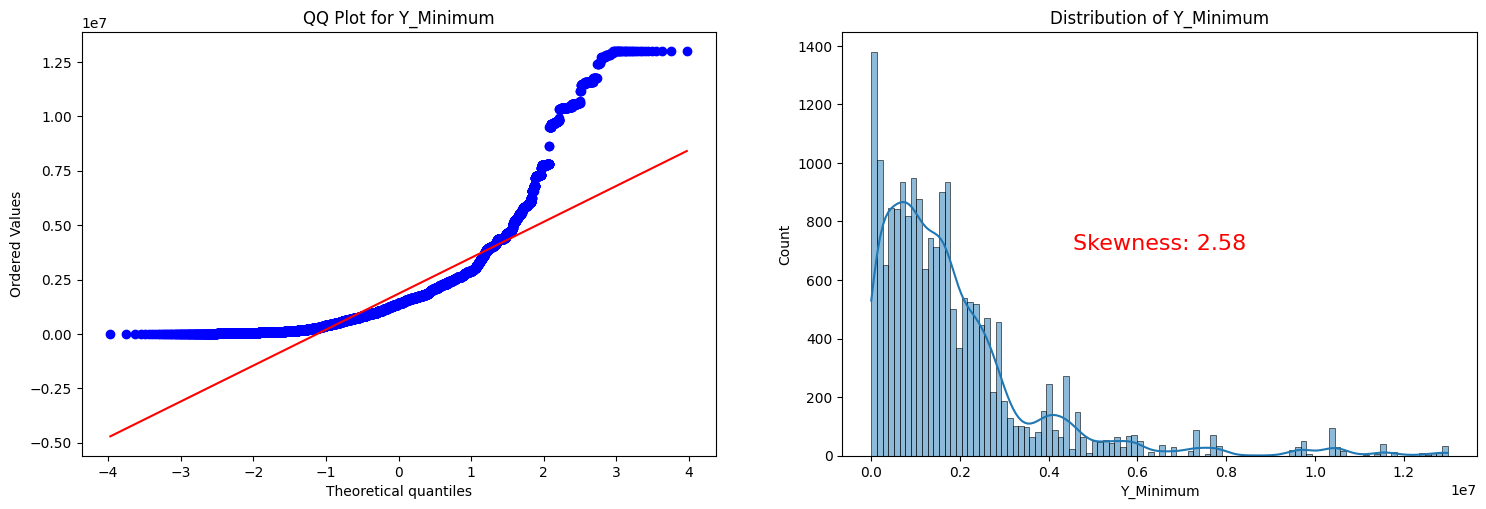

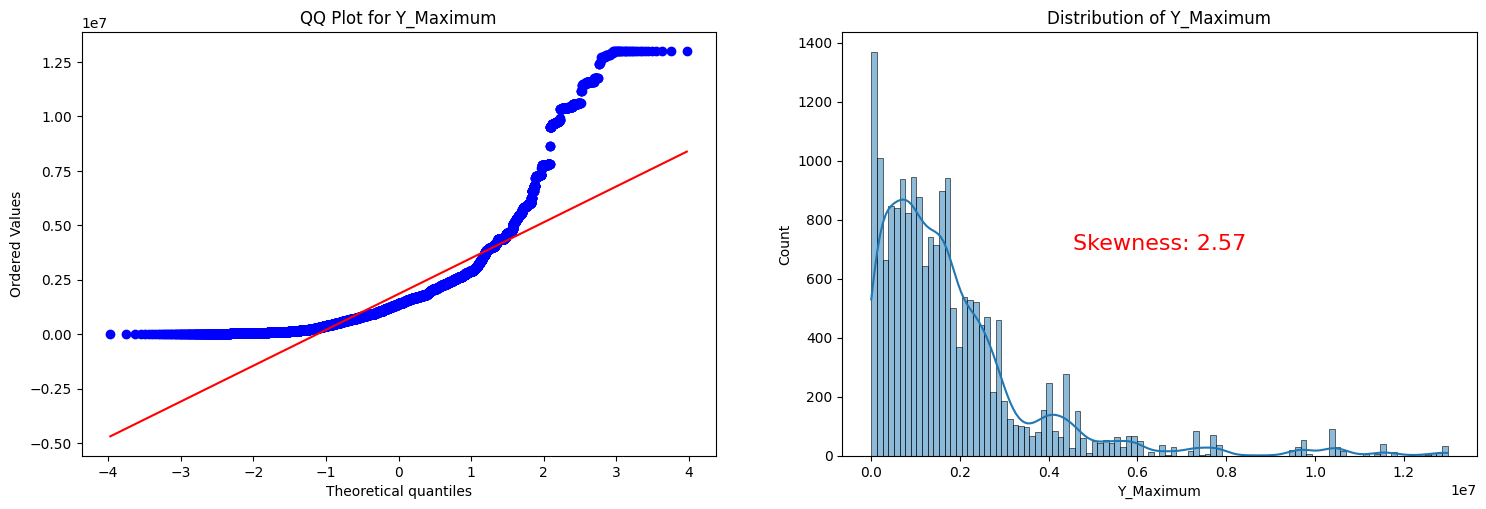

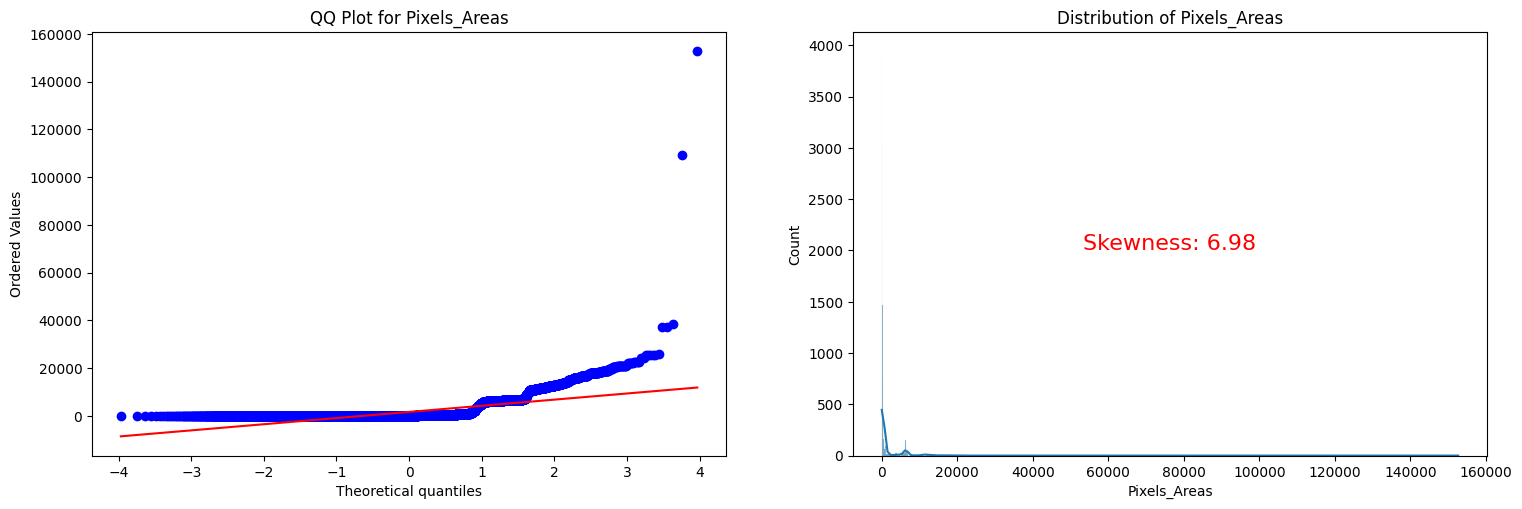

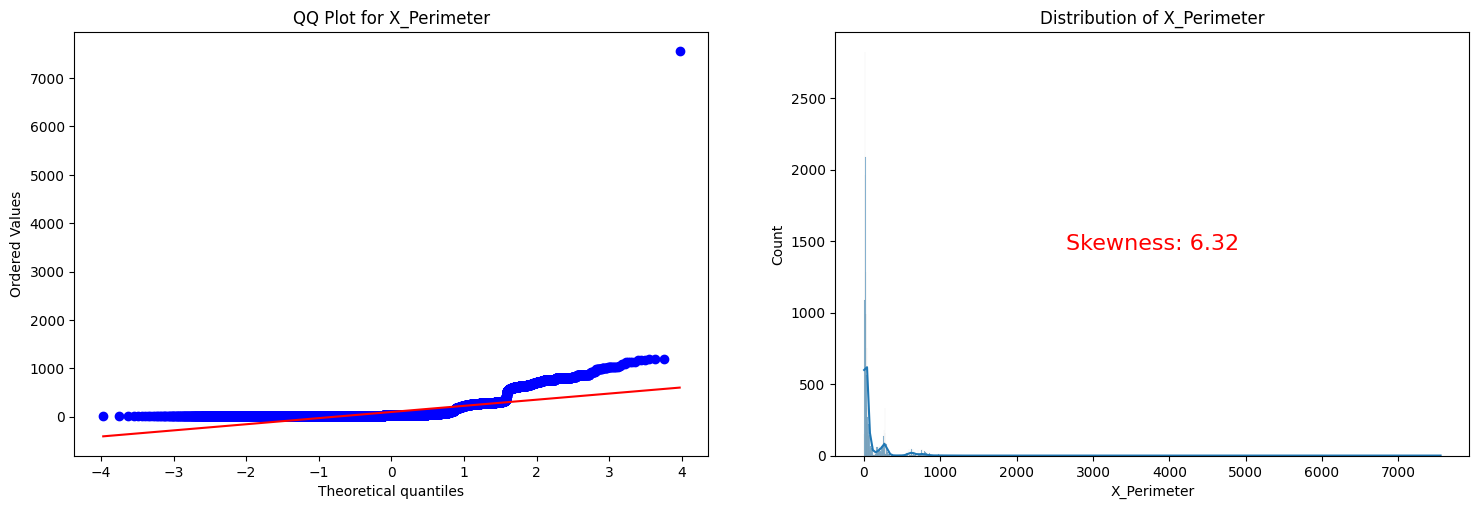

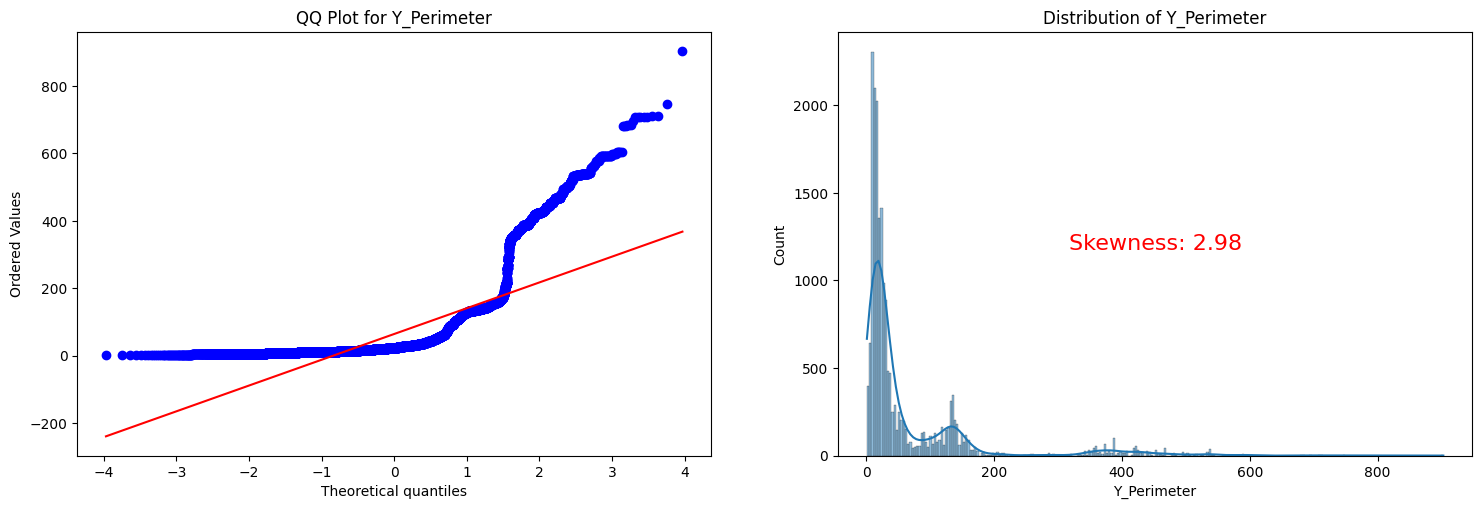

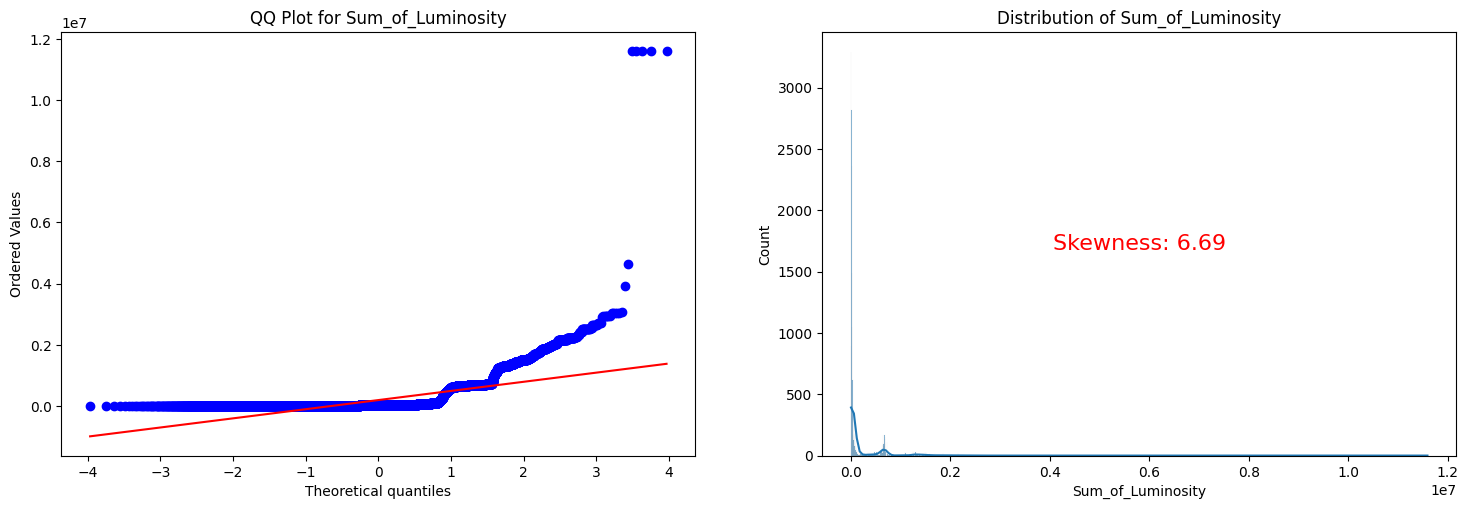

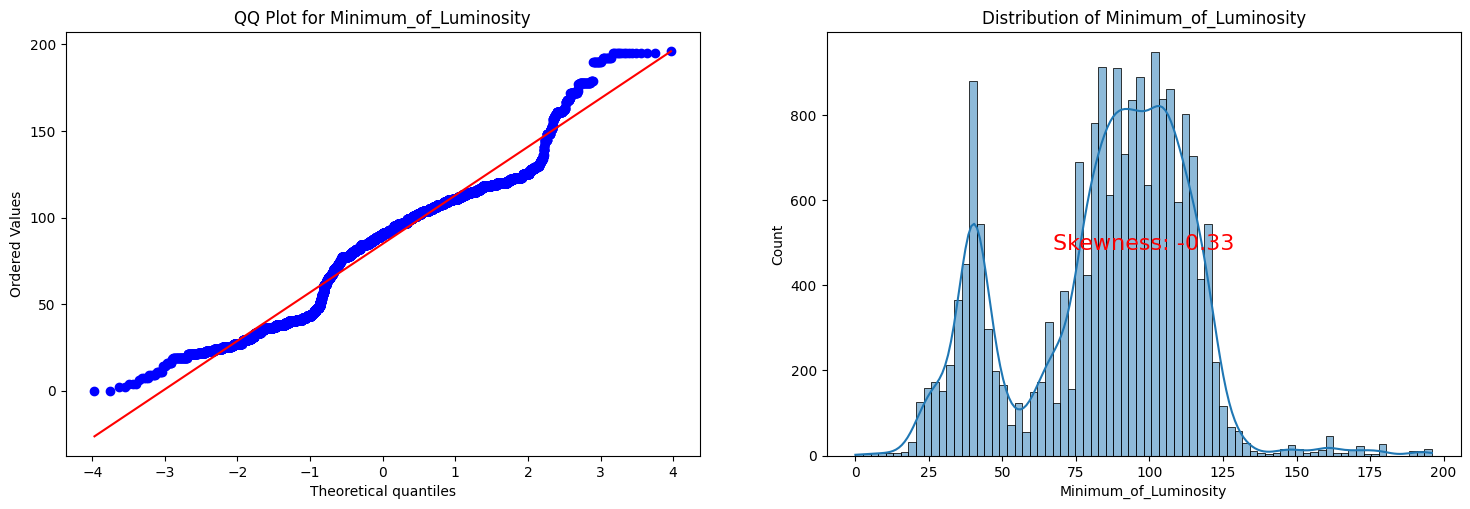

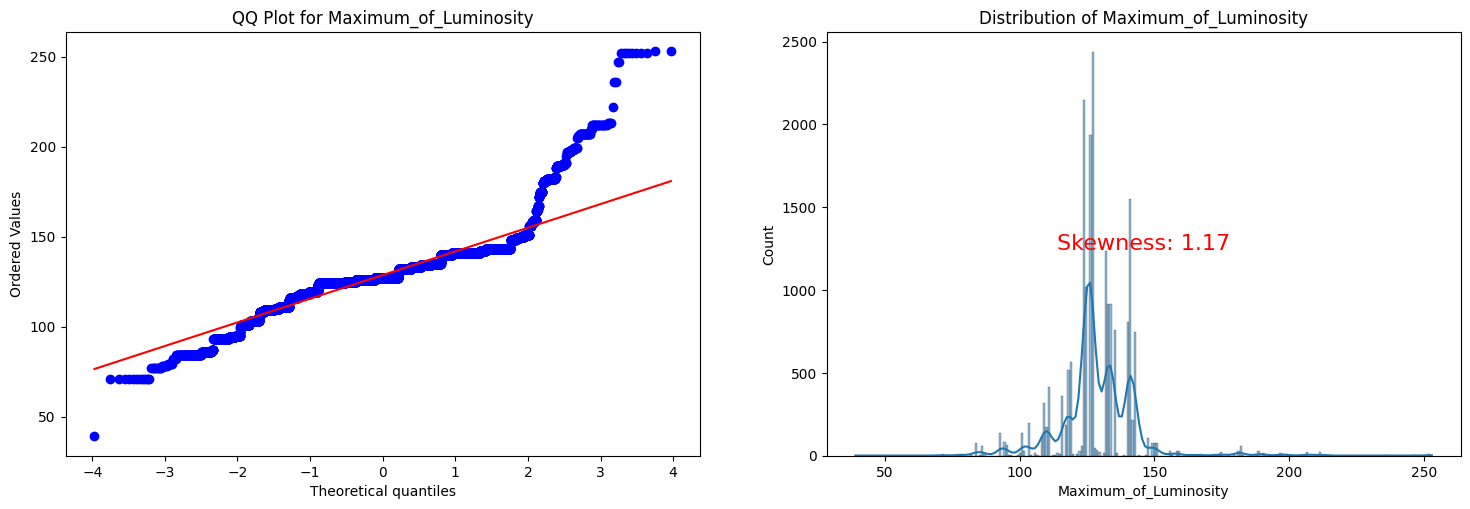

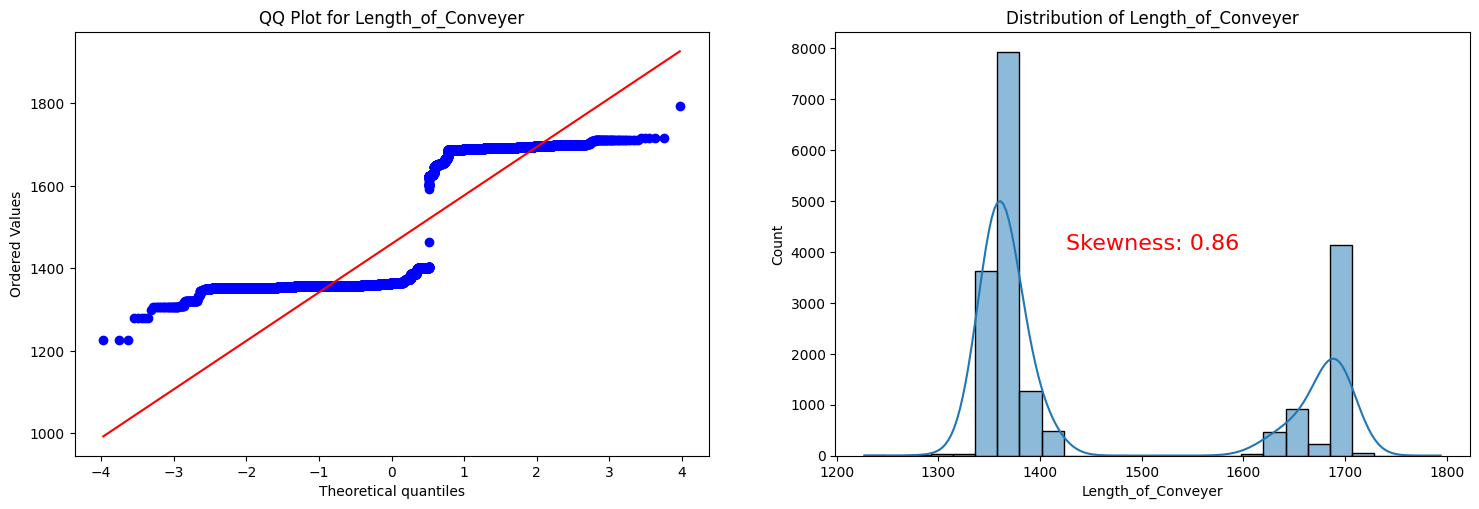

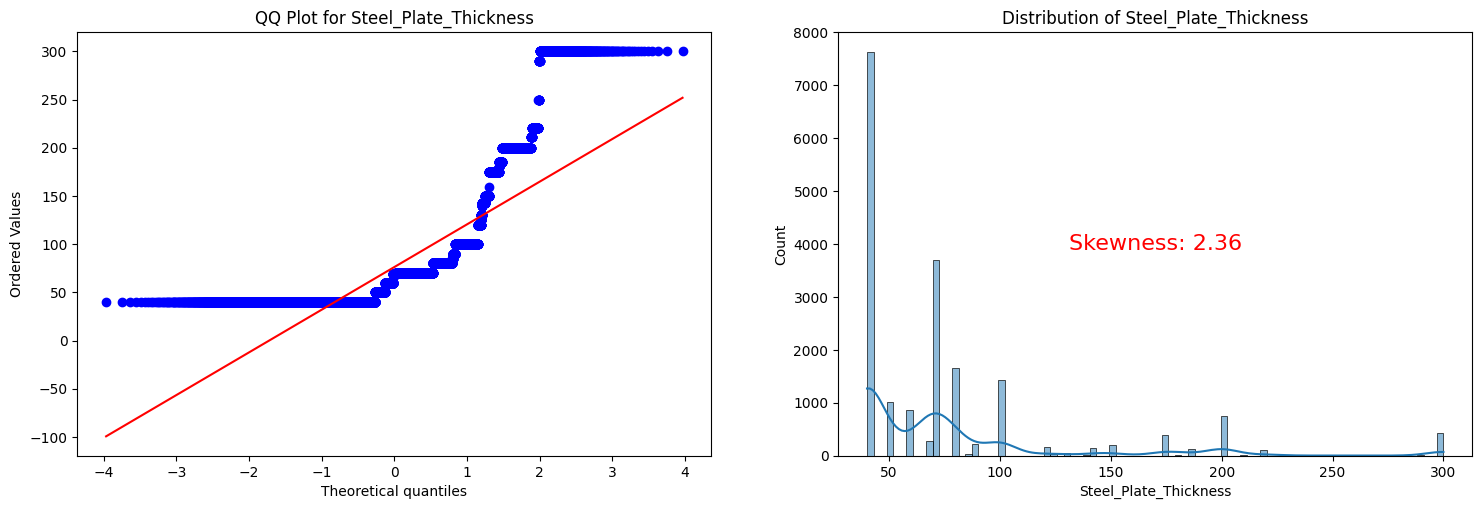

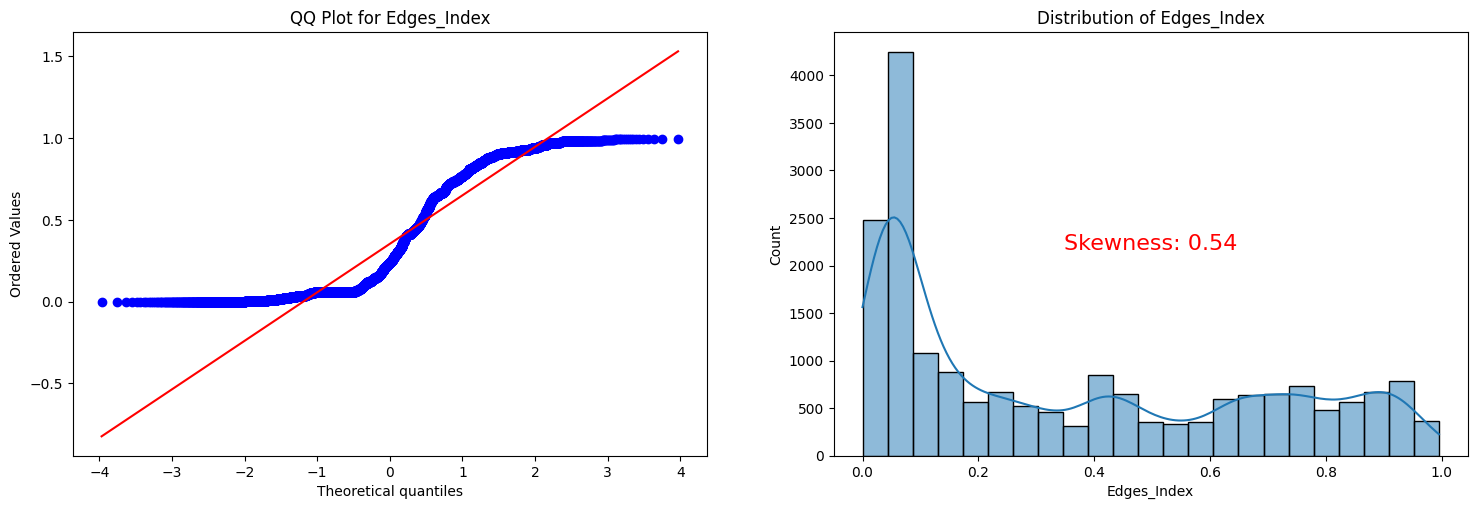

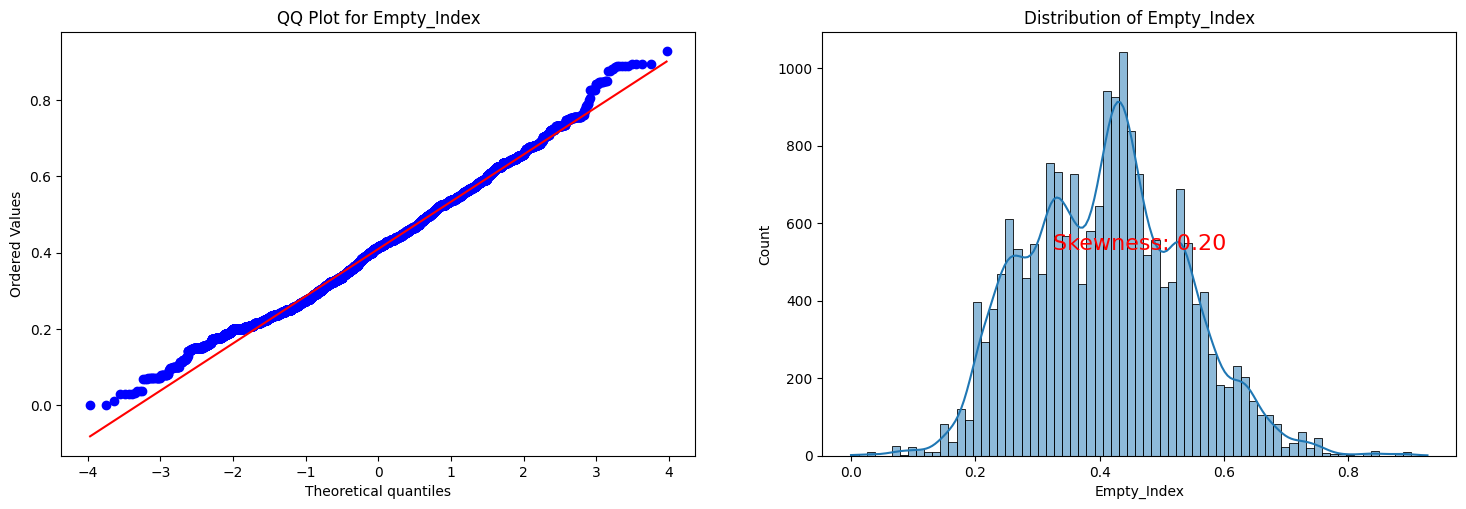

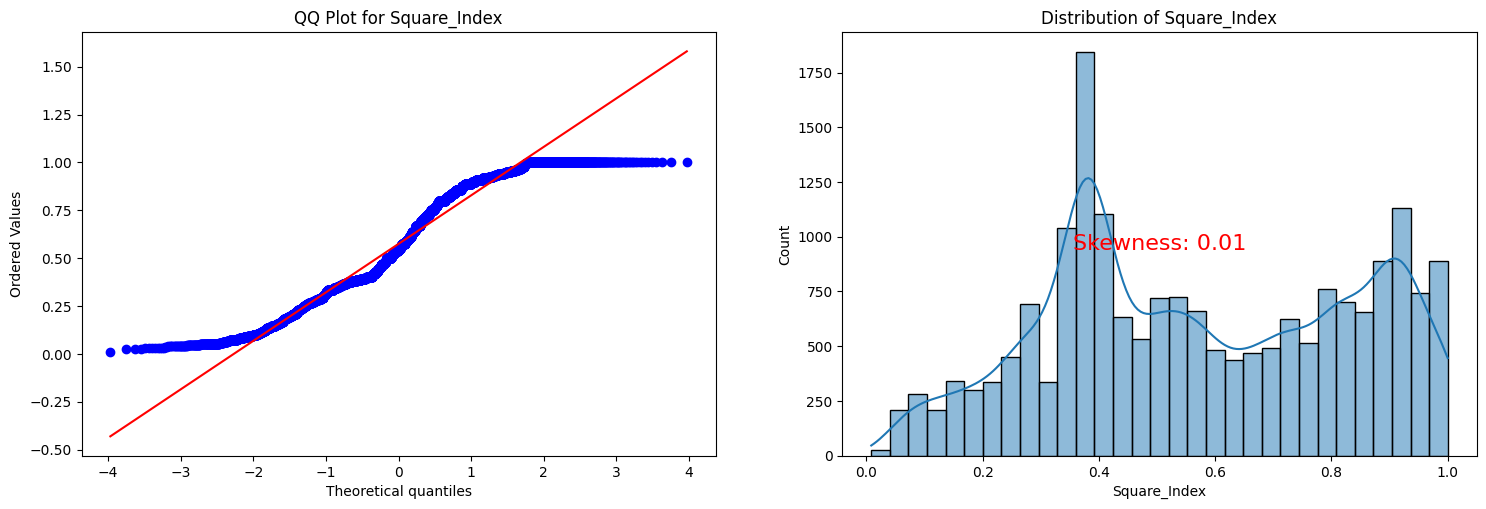

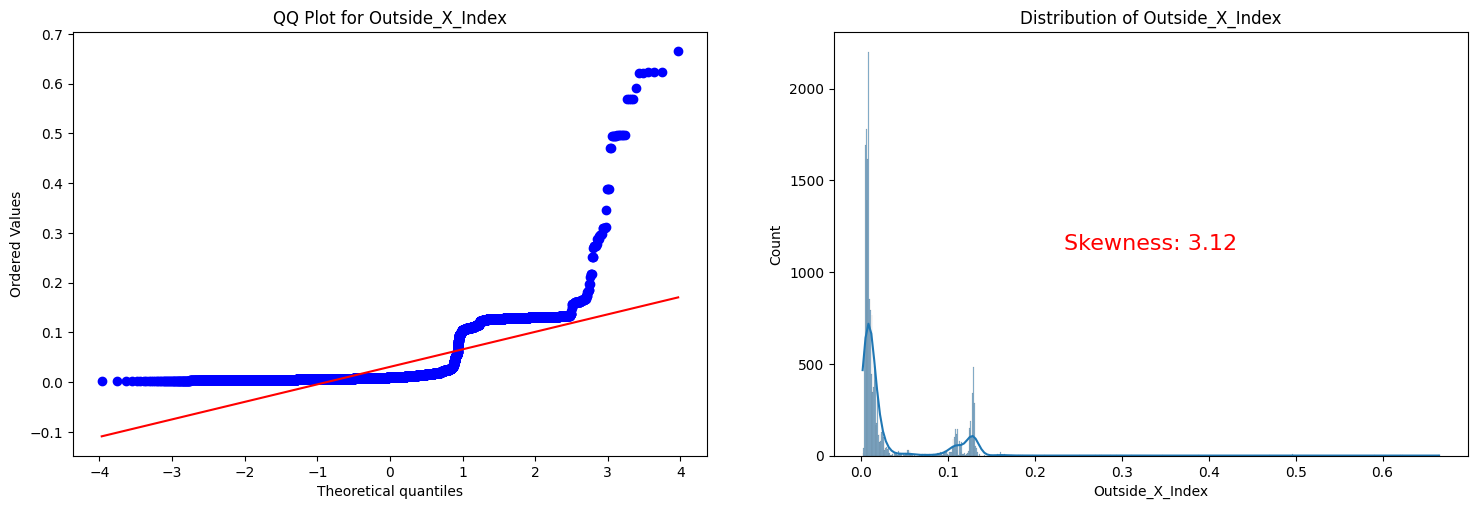

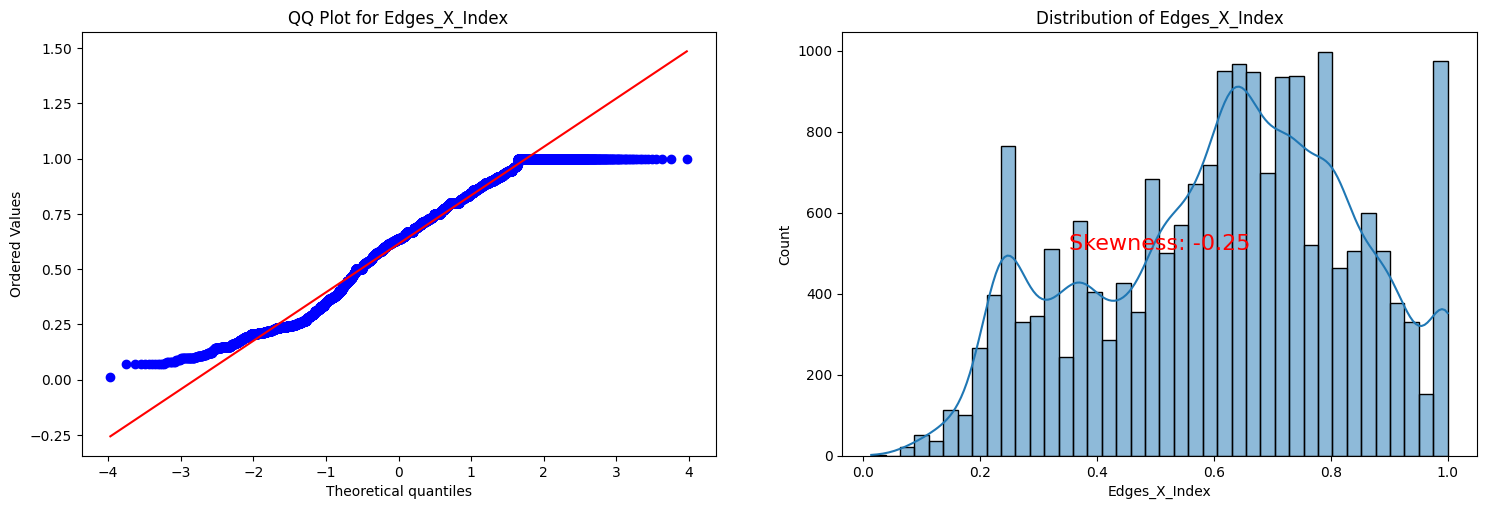

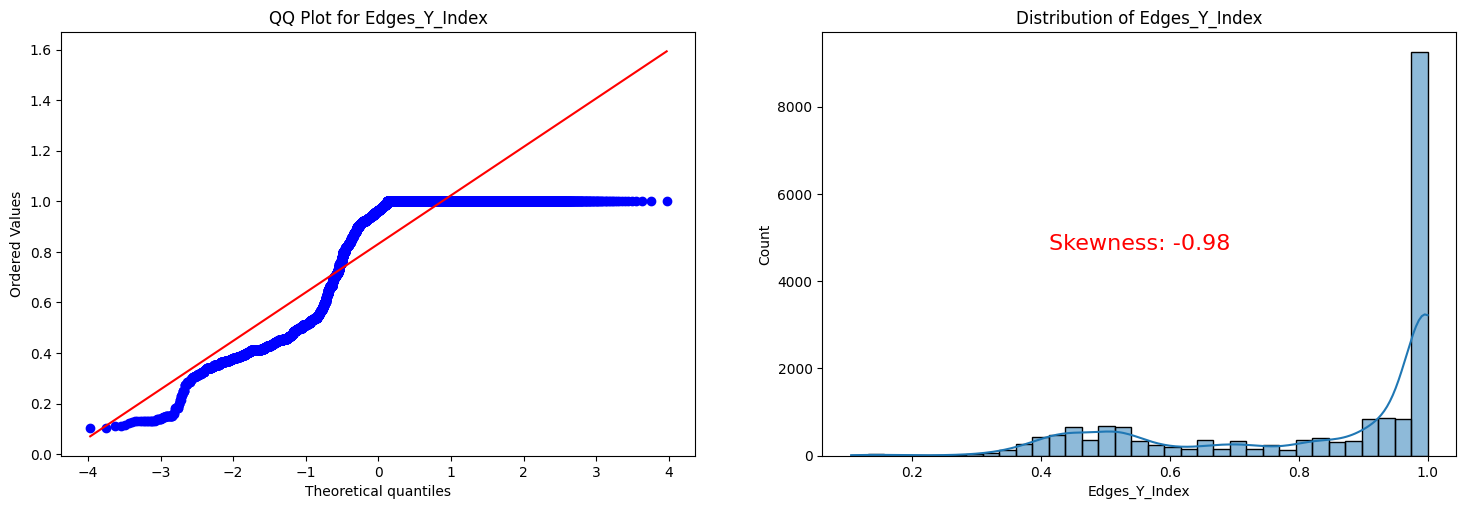

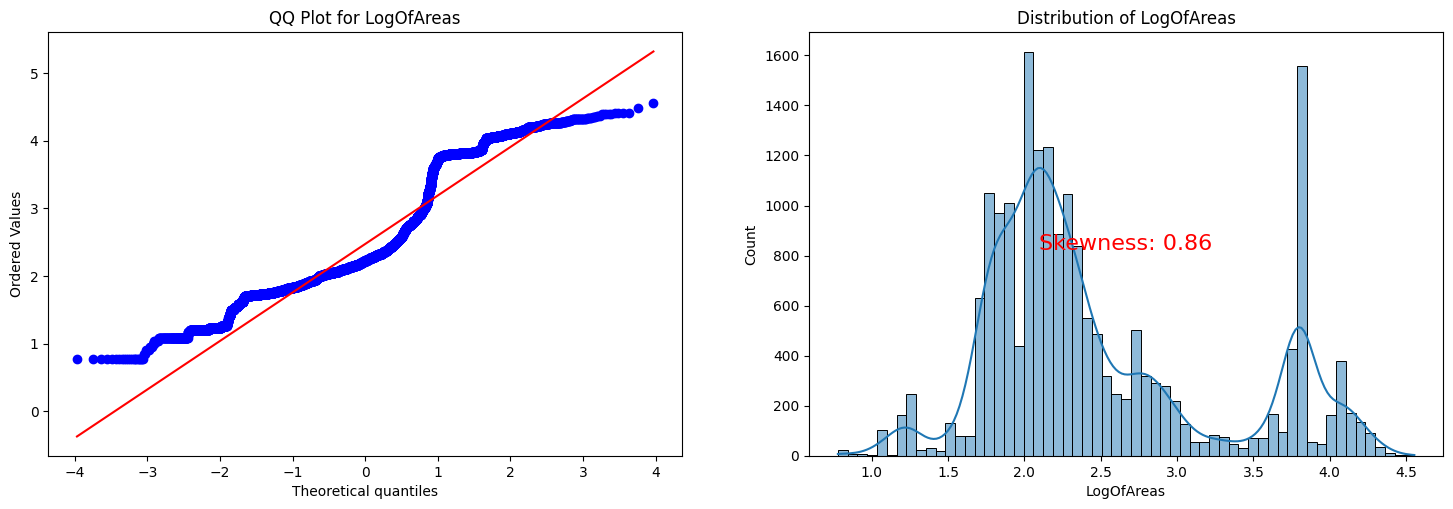

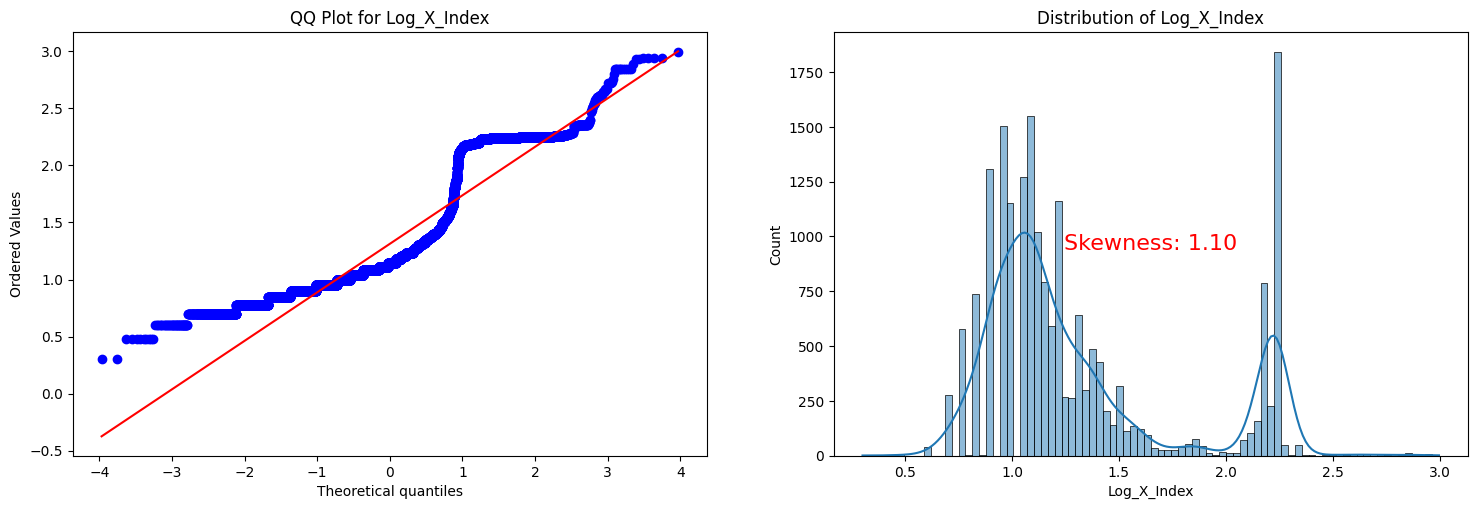

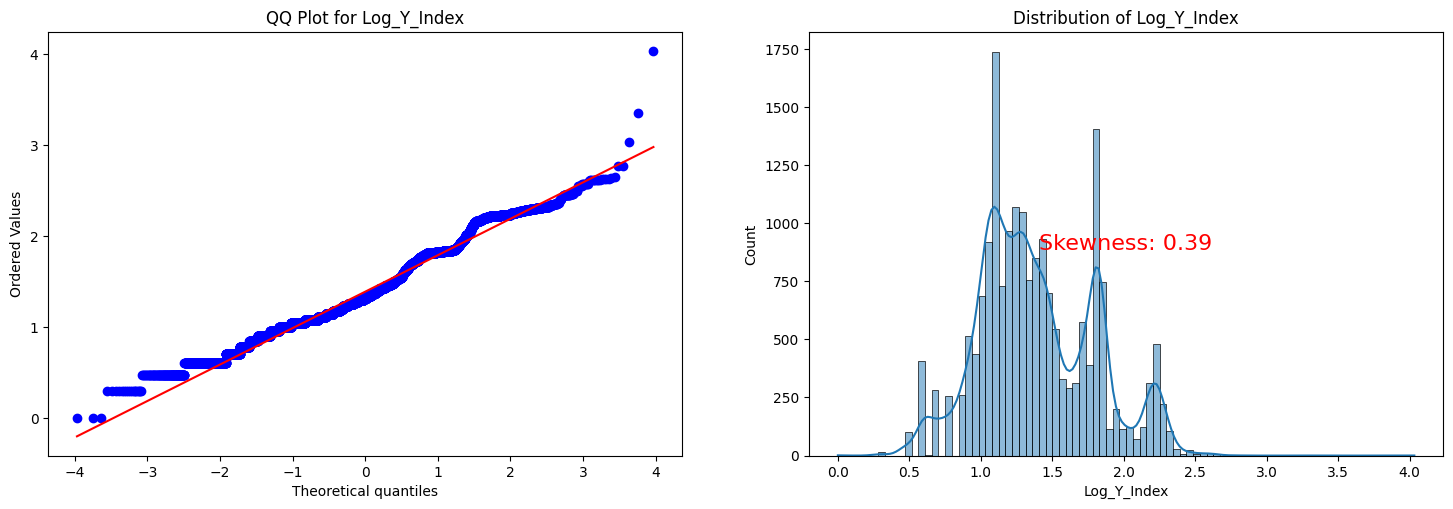

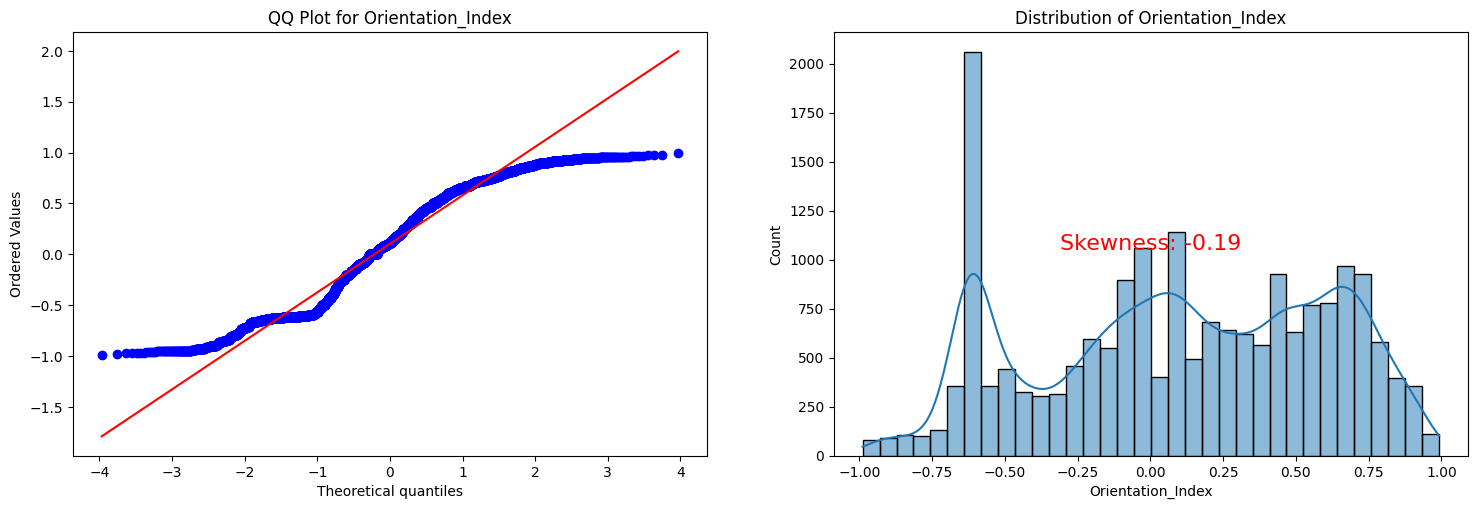

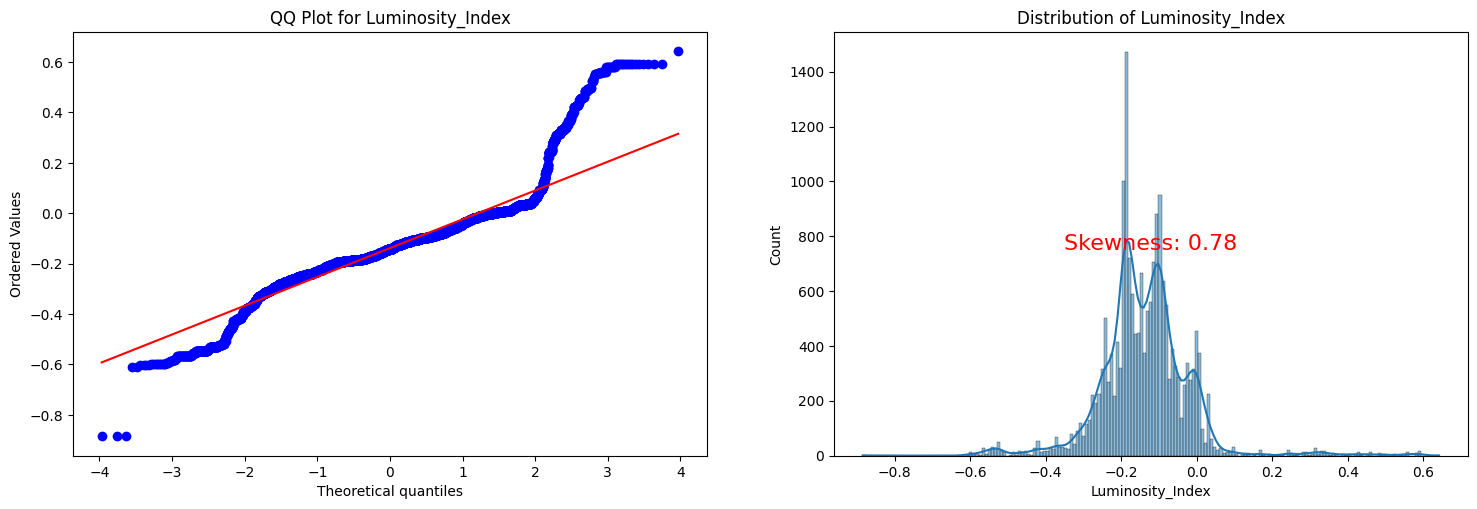

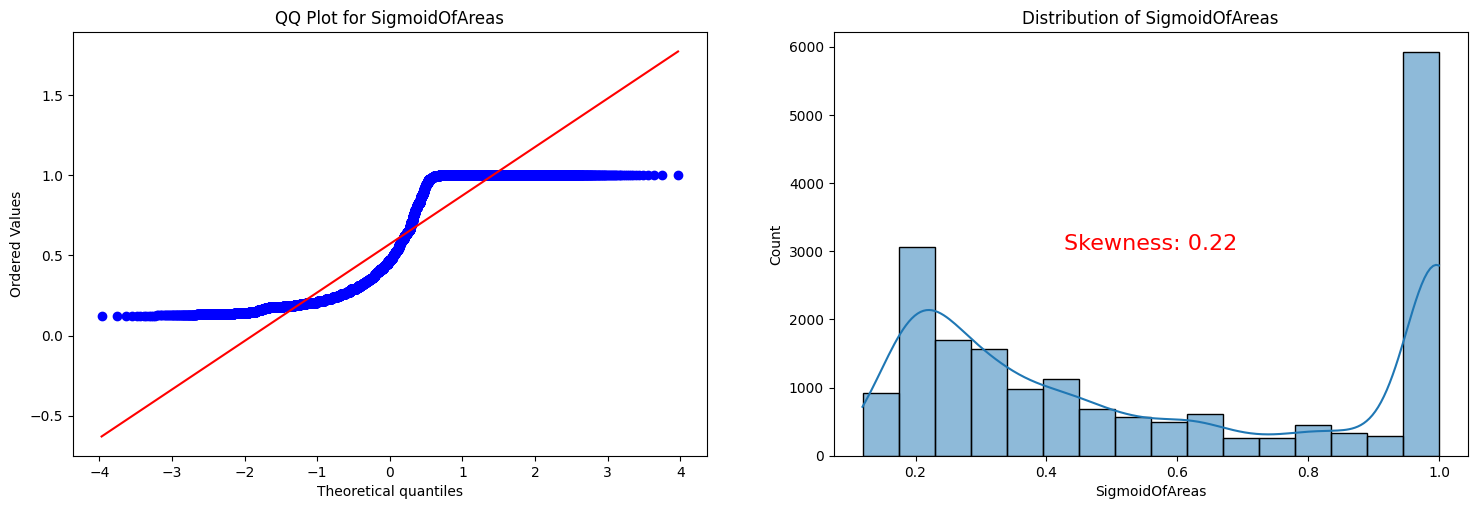

In [60]:
import scipy.stats as stats  
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return
    
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    stats.probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = stats.skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes, 
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()
# Example usage for each continuous variable
for var in continuous_vars:
    qq_plot_with_skewness(data, var)

In [35]:
X = data.drop(['id' , 'Pastry' , 'Z_Scratch' , 'K_Scatch', 'Stains' , 'Dirtiness' , 'Bumps' , 'Other_Faults'] , axis=1)

In [36]:
X

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            584        590     909972     909977            16            8   
1            808        816     728350     728372           433           20   
2             39        192    2212076    2212144         11388          705   
3            781        789    3353146    3353173           210           16   
4           1540       1560     618457     618502           521           72   
...          ...        ...        ...        ...           ...          ...   
19214        749        757     143210     143219            17            4   
19215        723        735    2488529    2488541           231           17   
19216          6         31    1578055    1578129           780          114   
19217          9         18    1713172    1713184           126           13   
19218       1505       1525    1733458    1733471           182           24   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0                5               2274                    113   
1               54              44478                     70   
2              420            1311391                     29   
3               29               3202                    114   
4               67              48231                     82   
...            ...                ...                    ...   
19214            4               2193                    122   
19215           26              27135                    104   
19216           98              71112                     41   
19217           26              14808                     88   
19218           33              22785                     98   

       Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
0                        140  ...           0.0059         1.0000   
1                        111  ...           0.0044         0.2500   
2                        141  ...           0.1077         0.2363   
3                        134  ...           0.0044         0.3750   
4                        111  ...           0.0192         0.2105   
...                      ...  ...              ...            ...   
19214                    140  ...           0.0044         1.0000   
19215                    133  ...           0.0065         0.7333   
19216                     94  ...           0.0199         0.1862   
19217                    132  ...           0.0068         0.7692   
19218                    143  ...           0.0083         0.6250   

       Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0             1.0000                   0.0      1.2041       0.9031   
1             1.0000                   1.0      2.6365       0.7782   
2             0.3857                   0.0      4.0564       2.1790   
3             0.9310                   1.0      2.3222       0.7782   
4             0.9861                   1.0      2.7694       1.4150   
...              ...                   ...         ...          ...   
19214         0.8000                   0.0      1.2305       0.7782   
19215         0.9216                   1.0      2.3636       1.0414   
19216         0.9554                   1.0      2.8921       1.4314   
19217         1.0000                   1.0      2.1004       1.0414   
19218         1.0000                   1.0      2.2601       1.1461   

       Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0           0.6990            -0.5000           -0.0104          0.1417  
1           1.7324             0.7419           -0.2997          0.9491  
2           2.2095            -0.0105           -0.0944          1.0000  
3           1.4314             0.6667           -0.0402          0.4025  
4           1.8808             0.9158           -0.2455          0.9998  
...            ...                ...               ...             ...  
19214       0.6021            -0.1429            0.0044          0.2901  
192

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,shuffle=True,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((17297, 27), (17297, 7), (1922, 27), (1922, 7))

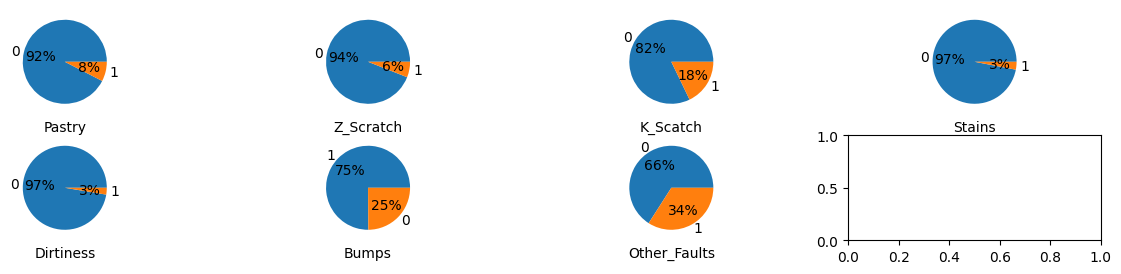

In [38]:
# Train Targets

targets=y_train.columns.values
_, ax = plt.subplots(2, 4, figsize=(15,3))
for i in range(len(targets)):
    fracs=list(y_train[targets[i]].value_counts().values)
    ax[i//4,i%4].pie(x=fracs,labels=y_train[targets[i]].unique(),autopct='%.0f%%')
    ax[i//4,i%4].set_xlabel(targets[i])

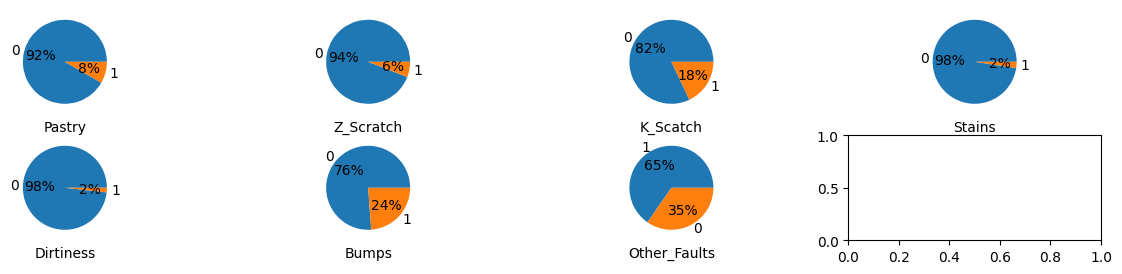

In [39]:
#Test Targets

targets=y_test.columns.values
_, ax = plt.subplots(2, 4, figsize=(15,3))
for i in range(len(targets)):
    fracs=list(y_test[targets[i]].value_counts().values)
    ax[i//4,i%4].pie(x=fracs,labels=y_test[targets[i]].unique(),autopct='%.0f%%')
    ax[i//4,i%4].set_xlabel(targets[i])

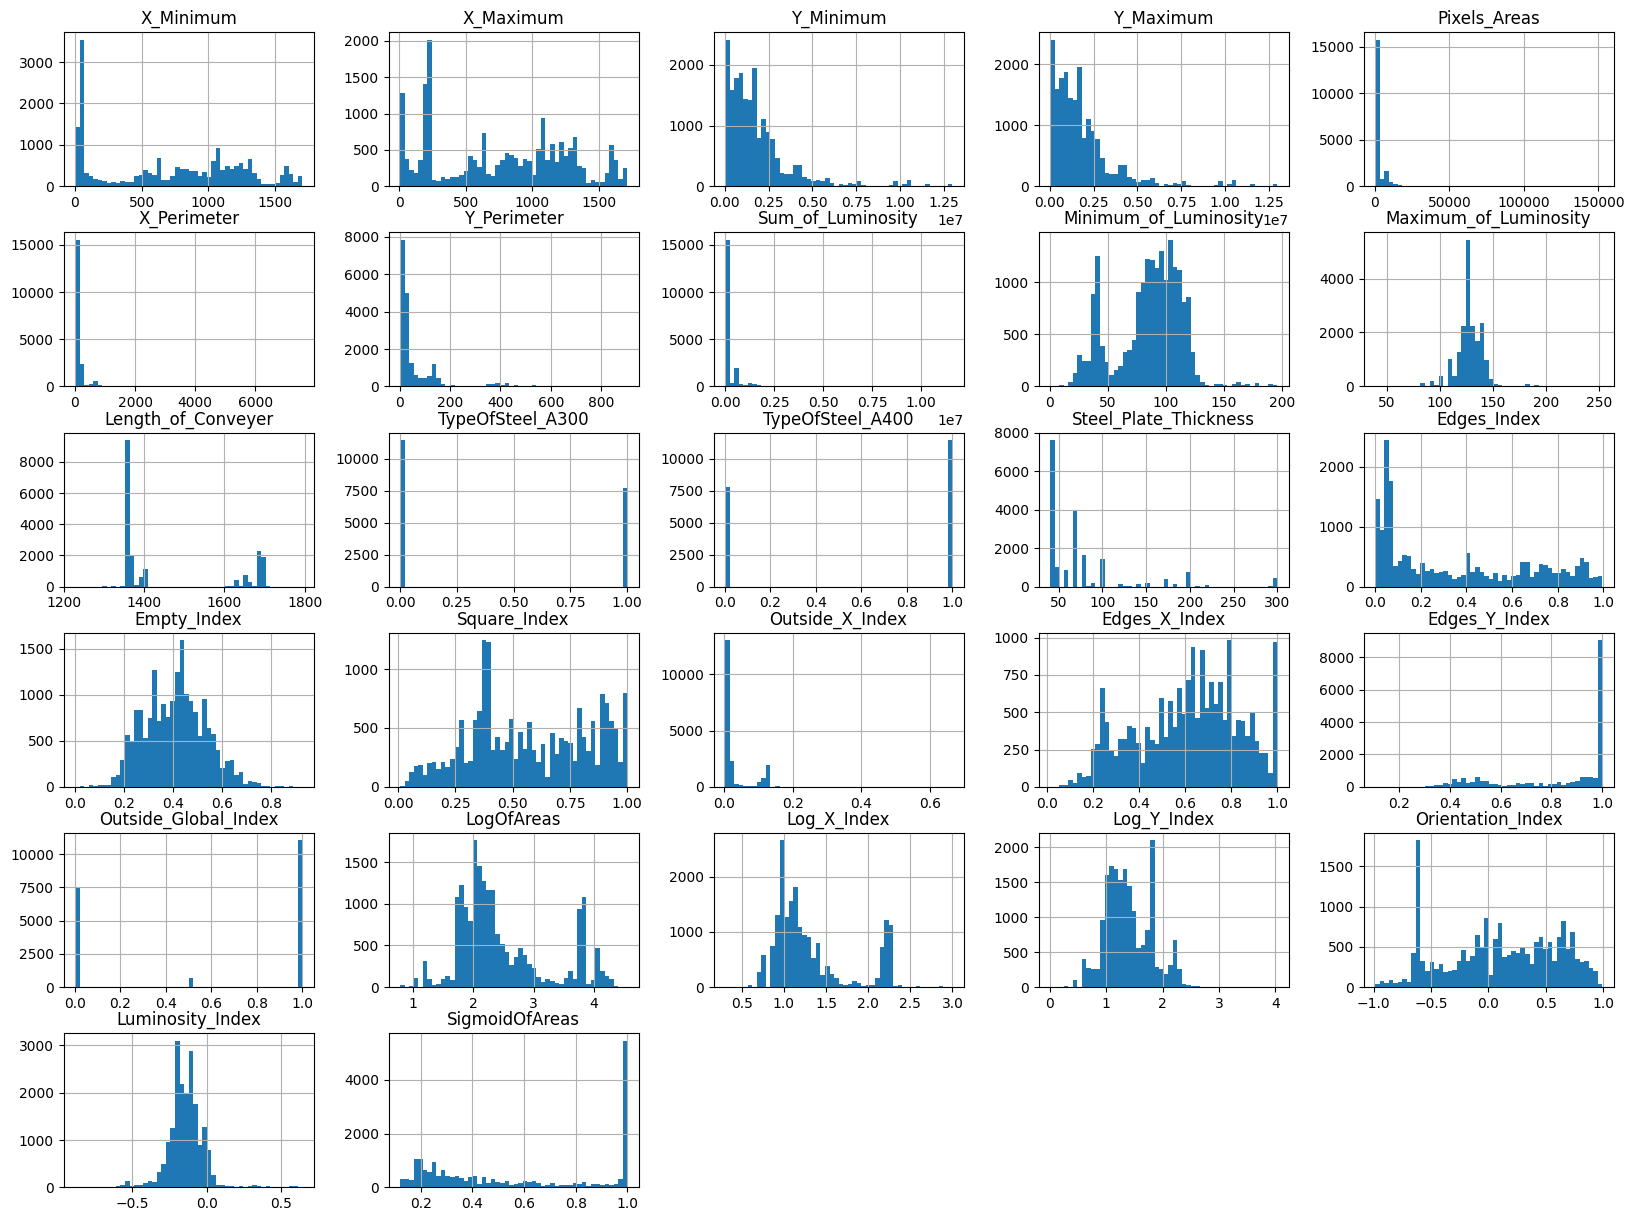

In [42]:
X.hist(bins=50, figsize=(20, 15))
plt.show()

In [43]:
cat_col=['TypeOfSteel_A300','TypeOfSteel_A400']
num_col=list(set(list(x_train.columns.values))-set(cat_col))
num_col

['Steel_Plate_Thickness',
 'Y_Perimeter',
 'Maximum_of_Luminosity',
 'Luminosity_Index',
 'X_Perimeter',
 'Empty_Index',
 'Y_Minimum',
 'LogOfAreas',
 'Length_of_Conveyer',
 'Log_Y_Index',
 'Log_X_Index',
 'Pixels_Areas',
 'Outside_Global_Index',
 'Orientation_Index',
 'Outside_X_Index',
 'SigmoidOfAreas',
 'Sum_of_Luminosity',
 'Edges_X_Index',
 'Minimum_of_Luminosity',
 'Y_Maximum',
 'X_Minimum',
 'Edges_Y_Index',
 'Edges_Index',
 'X_Maximum',
 'Square_Index']

In [44]:
scaler=StandardScaler()
x_train.loc[:,num_col]=scaler.fit_transform(x_train.loc[:,num_col])
x_test.loc[:,num_col]=scaler.transform(x_test.loc[:,num_col])

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\456413572.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.11309305  0.07288477  0.07288477 ... -0.67102653 -0.4850487
 -0.67102653]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:,num_col]=scaler.fit_transform(x_train.loc[:,num_col])
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\456413572.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.51577862 -0.53555904 -0.56522966 ...  1.1853372  -0.58501008
  0.66115616]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[:,num_col]=scaler.fit_transform(x_train.loc[:,num_col])
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\456413572.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

In [45]:
x_train

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
17508  -0.286389  -0.378862  -0.329044  -0.327836     -0.440732    -0.473500   
3105    1.107850   1.105657  -0.927722  -0.930410     -0.442634    -0.467909   
3111    0.753638   0.763076  -0.371814  -0.370881     -0.442634    -0.294582   
8709   -1.186992  -1.116113  -0.420912  -0.420311      1.205678     0.689469   
8299   -1.262356  -1.080051  -0.090949  -0.088187      1.249162     1.008167   
...          ...        ...        ...        ...           ...          ...   
11284  -1.258588  -1.072038  -0.024806  -0.021619      4.078062     3.965911   
11964   1.823810   1.872959  -0.068670  -0.065769     -0.403499    -0.406406   
5390   -1.262356  -1.138150   0.049598   0.053331      2.807788     1.248589   
860    -0.197836  -0.284702  -0.814840  -0.816787     -0.452418    -0.479091   
15795  -1.262356  -1.076045  -0.118094  -0.115493      1.296179     0.996985   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
17508    -0.515779          -0.418712               0.282505   
3105     -0.535559          -0.424471               0.143750   
3111     -0.565230          -0.424704               0.976279   
8709      0.720497           1.078860              -1.451930   
8299      0.690827           1.068876              -1.555996   
...            ...                ...                    ...   
11284     4.340314           4.168431              -1.694751   
11964    -0.327865          -0.408280              -1.035665   
5390      1.185337           2.723533               1.184412   
860      -0.585010          -0.431576               1.219100   
15795     0.661156           1.110954              -1.174420   

       Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
17508               0.301328  ...        -0.533140       0.101258   
3105               -0.678595  ...        -0.518462       0.985314   
3111                1.421240  ...         0.033002       0.917517   
8709               -0.678595  ...         1.781749       0.969600   
8299               -0.328623  ...         2.064819       0.209015   
...                      ...  ...              ...            ...   
11284               0.861284  ...         2.008205      -1.804693   
11964              -2.428458  ...        -0.518462      -0.803900   
5390                0.861284  ...         1.544808       0.486489   
860                 0.791290  ...        -0.518462       0.835801   
15795              -0.118639  ...         2.089981      -0.049602   

       Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
17508       0.763235              0.848168   -0.923530    -0.997591   
3105        0.763235             -1.226376   -0.995543    -0.666666   
3111       -0.208085             -0.189104   -0.995543     0.728819   
8709       -1.931805             -1.226376    1.741604     1.888233   
8299       -1.455436             -1.226376    1.741604     1.988857   
...              ...                   ...         ...          ...   
11284      -2.097242             -1.226376    2.307589     1.999539   
11964       0.763235              0.848168   -0.238225    -0.666666   
5390       -1.745518             -1.226376    2.133864     1.820937   
860         0.763235             -1.226376   -1.668232    -0.873681   
15795      -1.451357             -1.226376    1.803630     1.999539   

       Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
17508    -0.765147           0.813616          0.045327       -1.105756  
3105     -0.960456          -0.620389         -0.693033       -1.162278  
3111     -1.507421          -0.722818          1.245162       -1.072685  
8709      1.044175          -1.414417         -0.440261        1.287420  
8299      1.092509          -1.471368         -0.377899        1.287420  
...            ...                ...               ...             ...  
11284     1.526776          -0.323959         -2.016759        1.287420  
119

In [46]:
import optuna
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
def objective(trial):
    depth=trial.suggest_int("max_depth",6,20,step=1)
    estimators=trial.suggest_int("n_estimators",100,900,step=100)
    subsample=trial.suggest_float("subsample",0.5,1,step=0.1)
    colsample=trial.suggest_float("colsample_bytree",0.5,1,step=0.1)
    reg_alpha=trial.suggest_float("reg_alpha",0,2e-1,step=0.025)
    reg_lambda=trial.suggest_float("reg_lambda",0,2e-1,step=0.025)
    leaves=trial.suggest_int("max_leaves",12,40,step=2)
    lr=trial.suggest_float("learning_rate",0.05,0.3,step=0.05)
    bin_sample=trial.suggest_int("max_bin",256,4096,step=16)

    clf=XGBClassifier(n_estimators=estimators,
                       max_depth=depth,
                       max_leaves=leaves,
                       max_bin=bin_sample,
                       grow_policy='lossguide',
                       learning_rate=lr,
                       subsample=subsample,
                       colsample_bytree=colsample,
                       reg_alpha=reg_alpha,
                       reg_lambda=reg_lambda,
                       random_state=42,
                      n_jobs=-1)
    model=OneVsRestClassifier(clf)
    model.fit(x_train,y_train)
    return roc_auc_score(y_test,model.predict_proba(x_test))

In [48]:
sampler=optuna.samplers.TPESampler(seed=42)
study=optuna.create_study(sampler=sampler,direction='maximize')
study.optimize(objective,n_trials=50)

[I 2024-03-25 17:27:18,970] A new study created in memory with name: no-name-32892563-a84f-4221-9fd8-fc17442eda8c
[I 2024-03-25 17:27:48,601] Trial 0 finished with value: 0.8631040205202974 and parameters: {'max_depth': 11, 'n_estimators': 900, 'subsample': 0.9, 'colsample_bytree': 0.8, 'reg_alpha': 0.025, 'reg_lambda': 0.025, 'max_leaves': 12, 'learning_rate': 0.3, 'max_bin': 2560}. Best is trial 0 with value: 0.8631040205202974.
[I 2024-03-25 17:27:53,333] Trial 1 finished with value: 0.8868987661707346 and parameters: {'max_depth': 16, 'n_estimators': 100, 'subsample': 1.0, 'colsample_bytree': 0.9, 'reg_alpha': 0.025, 'reg_lambda': 0.025, 'max_leaves': 16, 'learning_rate': 0.1, 'max_bin': 2272}. Best is trial 1 with value: 0.8868987661707346.
[I 2024-03-25 17:28:04,415] Trial 2 finished with value: 0.8739540645179901 and parameters: {'max_depth': 12, 'n_estimators': 300, 'subsample': 0.8, 'colsample_bytree': 0.5, 'reg_alpha': 0.05, 'reg_lambda': 0.07500000000000001, 'max_leaves': 24

In [49]:
top3=study.trials_dataframe().sort_values(by='value',ascending=False)[:3].reset_index(drop=True)
unused_cols=['number',
             'value',
             'datetime_start',
             'datetime_complete',
             'duration',
             'state']
used_cols=list(set(top3.columns)-set(unused_cols))
top3=top3.loc[:,used_cols]
top3.rename(mapper=lambda x: x.replace('params_',''),axis=1,inplace=True)
top3=top3.T.to_dict()
top3

{0: {'max_depth': 17.0,
  'subsample': 0.7,
  'n_estimators': 400.0,
  'max_bin': 1936.0,
  'learning_rate': 0.05,
  'reg_lambda': 0.2,
  'max_leaves': 12.0,
  'reg_alpha': 0.0,
  'colsample_bytree': 0.8},
 1: {'max_depth': 14.0,
  'subsample': 0.5,
  'n_estimators': 300.0,
  'max_bin': 1424.0,
  'learning_rate': 0.05,
  'reg_lambda': 0.2,
  'max_leaves': 12.0,
  'reg_alpha': 0.0,
  'colsample_bytree': 0.6},
 2: {'max_depth': 16.0,
  'subsample': 0.8,
  'n_estimators': 400.0,
  'max_bin': 1920.0,
  'learning_rate': 0.05,
  'reg_lambda': 0.17500000000000002,
  'max_leaves': 12.0,
  'reg_alpha': 0.0,
  'colsample_bytree': 0.8}}

In [50]:
best_params=[top3[0],top3[1],top3[2]]
for param in best_params:
    param['max_bin']=int(param['max_bin'])
    param['max_leaves']=int(param['max_leaves'])
    param['n_estimators']=int(param['n_estimators'])
    param['max_depth']=int(param['max_depth'])
    param['random_state']=42
    param['n_jobs']=-1
    param['grow_policy']='lossguide'
best_params

[{'max_depth': 17,
  'subsample': 0.7,
  'n_estimators': 400,
  'max_bin': 1936,
  'learning_rate': 0.05,
  'reg_lambda': 0.2,
  'max_leaves': 12,
  'reg_alpha': 0.0,
  'colsample_bytree': 0.8,
  'random_state': 42,
  'n_jobs': -1,
  'grow_policy': 'lossguide'},
 {'max_depth': 14,
  'subsample': 0.5,
  'n_estimators': 300,
  'max_bin': 1424,
  'learning_rate': 0.05,
  'reg_lambda': 0.2,
  'max_leaves': 12,
  'reg_alpha': 0.0,
  'colsample_bytree': 0.6,
  'random_state': 42,
  'n_jobs': -1,
  'grow_policy': 'lossguide'},
 {'max_depth': 16,
  'subsample': 0.8,
  'n_estimators': 400,
  'max_bin': 1920,
  'learning_rate': 0.05,
  'reg_lambda': 0.17500000000000002,
  'max_leaves': 12,
  'reg_alpha': 0.0,
  'colsample_bytree': 0.8,
  'random_state': 42,
  'n_jobs': -1,
  'grow_policy': 'lossguide'}]

In [51]:
xgb1=XGBClassifier(**best_params[0])
xgb2=XGBClassifier(**best_params[1])
xgb3=XGBClassifier(**best_params[2])
model1=OneVsRestClassifier(xgb1)
model2=OneVsRestClassifier(xgb2)
model3=OneVsRestClassifier(xgb3)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
preds1=model1.predict_proba(x_test)
preds2=model2.predict_proba(x_test)
preds3=model3.predict_proba(x_test)
print('ROC score for first model: ', roc_auc_score(y_test,preds1))
print('ROC score for second model: ', roc_auc_score(y_test,preds2))
print('ROC score for third model: ', roc_auc_score(y_test,preds3))

ROC score for first model:  0.8875044041963082
ROC score for second model:  0.8871883958084569
ROC score for third model:  0.8870240991150846


In [52]:
ens_preds=(preds1+preds2+preds3)/3
print('ROC score for ensemble model: ', roc_auc_score(y_test,ens_preds))

ROC score for ensemble model:  0.8882351752208635


In [53]:
test=pd.read_csv('test.csv')
test.drop(['id'],axis=1,inplace=True)
test.loc[:,num_col]=scaler.transform(test.loc[:,num_col])
test

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2639631713.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.37472954 -0.67102653 -0.67102653 ... -0.67102653 -0.67102653
 -0.67102653]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[:,num_col]=scaler.transform(test.loc[:,num_col])
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2639631713.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.17951154 -0.35753529 -0.31797446 ...  4.52822759 -0.29819404
  3.15348864]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[:,num_col]=scaler.transform(test.loc[:,num_col])
C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2639631713.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0       0.576532   0.560732   1.038690   1.048784     -0.277667    -0.406406   
1       1.032485   1.037541  -0.752548  -0.754094     -0.356210    -0.389632   
2       1.222780   1.239885  -0.911473  -0.914052     -0.378224    -0.333720   
3      -1.038147  -1.172208  -0.851162  -0.853341     -0.435025    -0.479091   
4      -0.282621  -0.322767  -0.687129  -0.688249     -0.418718    -0.428771   
...          ...        ...        ...        ...           ...          ...   
12809   0.738565   0.727015  -0.737834  -0.739265     -0.371701    -0.356085   
12810   1.092777   1.107660   0.682678   0.690472     -0.440732    -0.484683   
12811  -1.258588  -1.088065  -0.138622  -0.136369      4.050341     3.915591   
12812   1.168141   1.175776  -0.604123  -0.604696     -0.351862    -0.294582   
12813  -1.262356  -1.134143   0.004442   0.007815      1.032558     3.009816   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0        -0.179512          -0.293628              -0.619401   
1        -0.357535          -0.346371               0.247817   
2        -0.317974          -0.369027               0.560015   
3        -0.525669          -0.416593               0.768147   
4        -0.486108          -0.400727               0.629392   
...            ...                ...                    ...   
12809    -0.268523          -0.386825              -0.203137   
12810    -0.456437          -0.424224               0.976279   
12811     4.528228           3.813070              -2.111015   
12812    -0.298194          -0.351900              -0.654090   
12813     3.153489           0.894798              -1.625373   

       Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
0                  -0.118639  ...        -0.442976      -0.218421   
1                   0.231334  ...        -0.543624      -1.672241   
2                   0.371323  ...        -0.317167      -0.062173   
3                   0.791290  ...        -0.564592       0.835801   
4                   0.371323  ...        -0.310877       1.024825   
...                      ...  ...              ...            ...   
12809              -1.798507  ...        -0.377975      -0.931861   
12810               0.861284  ...        -0.533140       0.736126   
12811               1.001273  ...         1.949494      -1.768774   
12812              -0.328623  ...        -0.442976      -1.675384   
12813               0.861284  ...         1.603519      -1.661017   

       Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0           0.763235              0.848168    0.482824    -0.423332   
1           0.763235              0.848168    0.124337    -0.873681   
2          -0.369896             -1.226376   -0.016667     0.021676   
3           0.763235              0.848168   -0.749674    -1.309717   
4          -1.352095             -1.226376   -0.430347     0.021676   
...              ...                   ...         ...          ...   
12809       0.397913              0.848168    0.028801    -0.174230   
12810       0.763235              0.848168   -0.923530    -0.997591   
12811      -1.912315             -1.226376    2.337682     2.004666   
12812       0.763235              0.848168    0.148516    -0.423332   
12813      -1.987555              0.848168    1.662627     1.788464   

       Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0         0.674025           1.167405         -0.732944        1.038482  
1         0.142350           1.645953         -0.061103        1.018037  
2        -0.165903          -1.283718          0.785350        0.239353  
3        -0.858363           0.161758          0.533410       -1.102449  
4        -0.600170          -1.381230          0.403698       -0.465371  
...            ...                ...               ...             ...  
12809     0.601770           1.358742         -1.438044        0.954901  
128

In [54]:
preds1=model1.predict_proba(test)
preds2=model2.predict_proba(test)
preds3=model3.predict_proba(test)
preds=(preds1+preds2+preds3)/3
submission=pd.read_csv('sample_submission.csv')
submission[y.columns.values]=preds
submission

id    Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0      19219  0.558536   0.000678  0.003711  0.000025   0.026877  0.163083   
1      19220  0.238080   0.010180  0.003271  0.000105   0.150907  0.113663   
2      19221  0.001384   0.074430  0.036399  0.000110   0.001832  0.271338   
3      19222  0.141565   0.000821  0.000540  0.000234   0.004864  0.387056   
4      19223  0.002267   0.001058  0.000681  0.000540   0.004178  0.655523   
...      ...       ...        ...       ...       ...        ...       ...   
12809  32028  0.056764   0.048264  0.001630  0.000018   0.010587  0.250057   
12810  32029  0.217175   0.002068  0.010427  0.004370   0.062923  0.198879   
12811  32030  0.000291   0.000472  0.926023  0.000023   0.000156  0.000826   
12812  32031  0.286968   0.005618  0.009294  0.000019   0.048736  0.145912   
12813  32032  0.000459   0.002355  0.892416  0.000046   0.000169  0.001142   

       Other_Faults  
0          0.389966  
1          0.307477  
2          0.486063  
3          0.487620  
4          0.376423  
...             ...  
12809      0.388449  
12810      0.381066  
12811      0.053100  
12812      0.298658  
12813      0.087522  

[12814 rows x 8 columns]

In [55]:
submission.to_csv('submission.csv',index=False)